* Criado por: Gabriel Quintella
* Data Criação: 24.01.2023
* Data Última Modificação: 08.02.2023
* Repositório: https://github.com/dbaassists/Projeto-KB-Spark/blob/main/Projeto%20KB%20Spark.ipynb

DESCRIÇÃO DO PROJETO

Criar uma base de conhecimento (KB) com comandos pyspark.

*  Dia 01 - 24.01.2023 - Lançamento do Projeto;
*  Dia 02 - 26.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 03 - 27.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 04 - 28.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 05 - 29.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 06 - 30.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 07 - 31.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 08 - 01.02.2023 - Reorganização dos tópicos e inclusões de novos exemplos;
*  Dia 09 - 02.02.2023 - Exemplos de criação de arquivos;
*  Dia 10 - 03.02.2023 - Inclusão de Novos Exemplos;
*  Dia 11 - 05.02.2023 - Inclusão de Novos Exemplos;
*  Dia 12 - 06.02.2023 - Trabalhanco com Strings;
*  Dia 13 - 07.02.2023 - Trabalhanco com Datas;
*  Dia 14 - 08.02.2023 - Trabalhanco com Relacionamentos;


 Sumário

* 01 - Instalação da Biblioteca PySpark
* 02 - Definição de Bibliotecas
* 02.1 - Arquivos Usados
* 03 - Métodos de Importação de Arquivos CSV
* 03.1 - Importando Arquivo CSV de forma FULL
* 03.2 - Importando Arquivo CSV Definindo o Delimitador de Colunas
* 03.2.1 - Comando Semelhante ao DataFrame.info() do Pandas
* 03.2.2 - Consultando a Estrutura do DataFrame Spark
* 03.2.3 - Formas de Aplicar o Método DataFrame.show()
* 03.3 - Importando Arquivo CSV Definindo Delimitador de Colunas e Cabeçalho
* 03.4 - Importando TODOS os Arquivos CSV de um Diretório
* 03.5 - Importando Arquivo CSV Definindo inferSchema
* 03.6 - Importando Arquivo CSV Definindo encoding
* 03.7 - Definindo a Estrutura de um DataFrame e Importar CSV
* 04 - Trabalhando com Datas - Converte coluna String (DD/MM/AAA) para Date (AAAAMMDD)
* 04.1 - Trabalhando com Datas - Retornando a Data Atual
* 04.2 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Ano
* 04.3 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Mês
* 04.4 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Dia	
* 05 - Manipulando informações de um DataFrame
* 05.1 - Tratando Valores Nulos
* 05.2 - Filtrando Valores
* 05.2.1 - Semelhante a cláusula LIKE - "CONTÉM" de Bancos de Dados
* 05.2.2 - Semelhante a cláusula LIKE - "INICIA COM" de Bancos de Dados
* 05.2.3 - Semelhante a cláusula LIKE - "TERMINA COM" de Bancos de Dados
* 05.2.4 - Semelhante a cláusula WHERE de Bancos de Dados
* 05.2.5 - Semelhante a cláusula IN de Bancos de Dados
* 05.3 - Tratando Valores com UPPER, LOWER e INITCAPT
* 06 - Transformando o DataFrame Spark em Tabela Temporária
* 06.1 - Lendo a Tabela e Transformando em outro DataFrame Spark
* 07 - Convertendo DataType de um DataFrame Spark
* 07.1 - De uma Coluna
* 07.2 - Criando uma nova Coluna
* 08 - Renomeando Coluna(s) em DataFrame Spark
* 08.1 - Uma Única Coluna
* 08.2 - Várias Colunas
* 09 - Ordenando um DataFrame Spark
* 09.1 - Ordenando um DataFrame Spark por uma Coluna
* 09.2 - Ordenando um DataFrame Spark por Várias Colunas
* 10 - Agrupando um DataFrame Spark
* 11 - Funções de Agrupamento (Count(), Sum(), Min(), Max() e Mean())
* 12 - Lendo/Gerando Arquivos a Parquet
* 12.1 - Gerando Arquivos a Parquet
* 12.2 - Lendo Arquivos a Parquet
* 13 - Gerando Arquivos a CSV
* 14 - Trabalhanco com Strings
* 12.1 - F.lit()
* 12.2 - F.concat()
* 12.3 - F.coalesce()
* 12.4 - F.md5()
* 12.5 - F.length()
* 12.6 - F.lower()
* 12.7 - F.upper()
* 12.8 - F.lpad()
* 12.9 - F.rpad()
* 12.10 - F.trim()
* 12.11 - F.ltrim()
* 12.12 - F.rtrim()
* 12.13 - F.substring()
* 13 - Relacionamentos (Join) - Inner, Left e Right
* 13.1 - Relacionamento do Tipo INNER JOIN
* 13.1.1 - Padrão Default
* 13.1.2 - Explicitando o Tipo de Relacionamento
* 13.1 - Relacionamento do Tipo INNER JOIN
* 13.2 - Relacionamento do Tipo LEFT JOIN
* 13.3 - Relacionamento do Tipo RIGHT JOIN

# 01 - Instalação da Biblioteca PySpark

In [1]:
#pip install pyspark

# 02 - Definição de Bibliotecas

In [2]:
import sys
import requests
import pandas as pd
import json
import pyspark.sql.functions as F #import explode_outer, col
from pyspark.sql.types import *
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkConf
from pyspark import SparkContext
import urllib
from sqlalchemy import __version__ as sa_version, create_engine, text


# 02.1 - Arquivos Usados

In [3]:
arquivoDadosEleitorais = '../ProjetoSparkKB/Dados/Candidato/consulta_cand_2022_BRASIL.csv'

arquivoIndicadorHomicidio = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio.csv'

arquivoIndicadorHomicidio2 = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio_2.csv'

arquivoIndicadorHomicidioRes = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio_res.csv'

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", "true")

# 03 - Métodos de Importação de Arquivos CSV

* A CSV dataset is pointed to by path.
* The path can be either a single CSV file or a directory of CSV files
* path = "examples/src/main/resources/people.csv"

df = spark.read.csv(path)

df.show()

** Documentação: https://spark.apache.org/docs/latest/sql-data-sources-csv.html

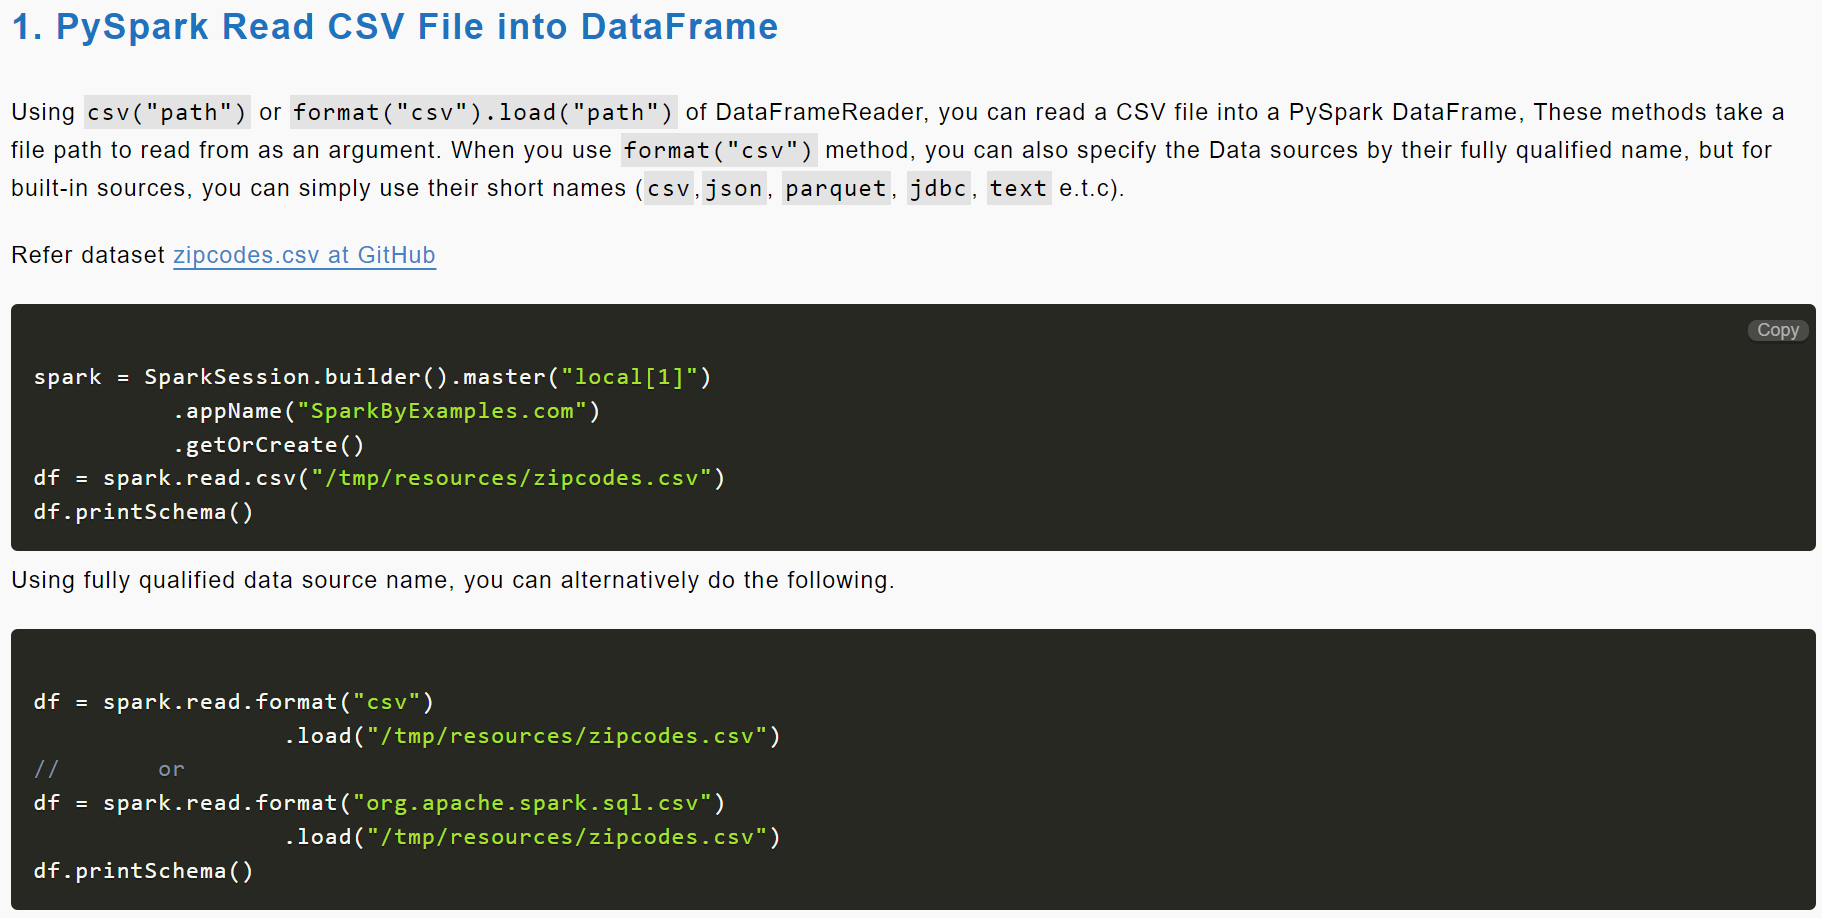

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

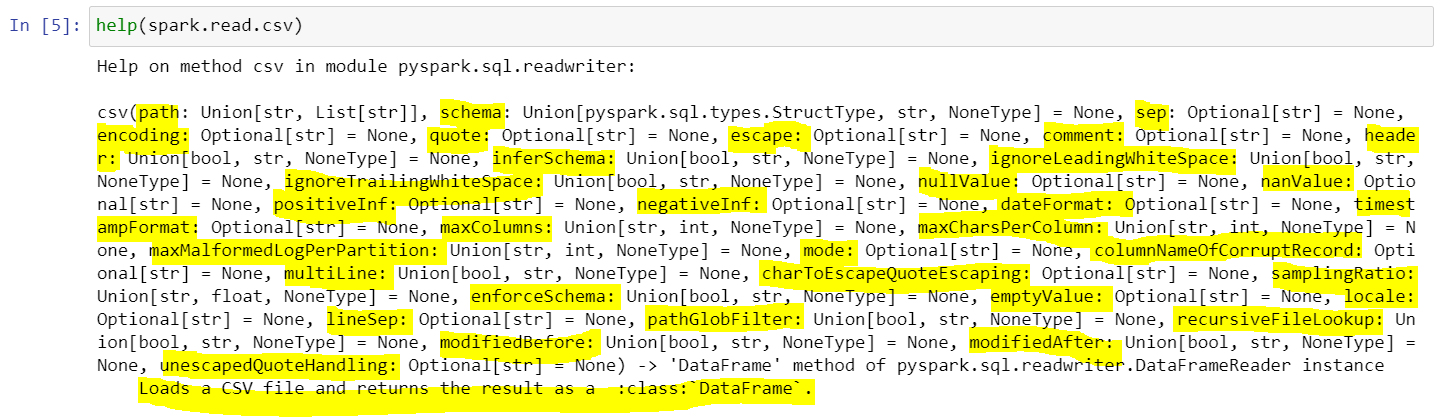

In [6]:
help(spark.read.csv)

Help on method csv in module pyspark.sql.readwriter:

csv(path: Union[str, List[str]], schema: Union[pyspark.sql.types.StructType, str, NoneType] = None, sep: Optional[str] = None, encoding: Optional[str] = None, quote: Optional[str] = None, escape: Optional[str] = None, comment: Optional[str] = None, header: Union[bool, str, NoneType] = None, inferSchema: Union[bool, str, NoneType] = None, ignoreLeadingWhiteSpace: Union[bool, str, NoneType] = None, ignoreTrailingWhiteSpace: Union[bool, str, NoneType] = None, nullValue: Optional[str] = None, nanValue: Optional[str] = None, positiveInf: Optional[str] = None, negativeInf: Optional[str] = None, dateFormat: Optional[str] = None, timestampFormat: Optional[str] = None, maxColumns: Union[str, int, NoneType] = None, maxCharsPerColumn: Union[str, int, NoneType] = None, maxMalformedLogPerPartition: Union[str, int, NoneType] = None, mode: Optional[str] = None, columnNameOfCorruptRecord: Optional[str] = None, multiLine: Union[bool, str, NoneType] 

# 03.1 - Importando Arquivo CSV de forma FULL

* Nos próximos passos vamos abordar os seguintes conceitos da "spark.read.csv()"


### Path: 
* * É o diretório que o arquivo encotra-se armazenado;


### Sep: 
* * É o separador que se utiliza para que as colunas sejam separadas dentro do arquivo de dados;


### Header:
* * É o boleano que utiliza a primeira linha para a nomeação das colunas do arquivo;


### InferSchema:
* * Presume o datatype baseando-se nas colunas que estão nele;

In [7]:

df = spark.read.csv(arquivoDadosEleitorais)


* Podemos realizar um "dir(DataFrame)" para poder listar todos os métodos disponíveis

In [8]:
dir(df)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_collect_as_arrow',
 '_jcols',
 '_jdf',
 '_jmap',
 '_joinAsOf',
 '_jseq',
 '_lazy_rdd',
 '_repr_html_',
 '_sc',
 '_schema',
 '_session',
 '_sort_cols',
 '_sql_ctx',
 '_support_repr_html',
 '_to_corrected_pandas_type',
 'agg',
 'alias',
 'approxQuantile',
 'cache',
 'checkpoint',
 'coalesce',
 'colRegex',
 'collect',
 'columns',
 'corr',
 'count',
 'cov',
 'createGlobalTempView',
 'createOrReplaceGlobalTempView',
 'createOrReplaceTempView',
 'createTempView',
 'crossJoin',
 'crosstab',
 'cube',
 'describe',
 'distinct',
 'drop',
 'dropDuplicates',
 'drop_duplicates',
 'dropna',
 'dtypes',
 

# 03.2 - Importando Arquivo CSV Definindo o Delimitador de Colunas

* Read a csv with delimiter, the default delimiter is ","

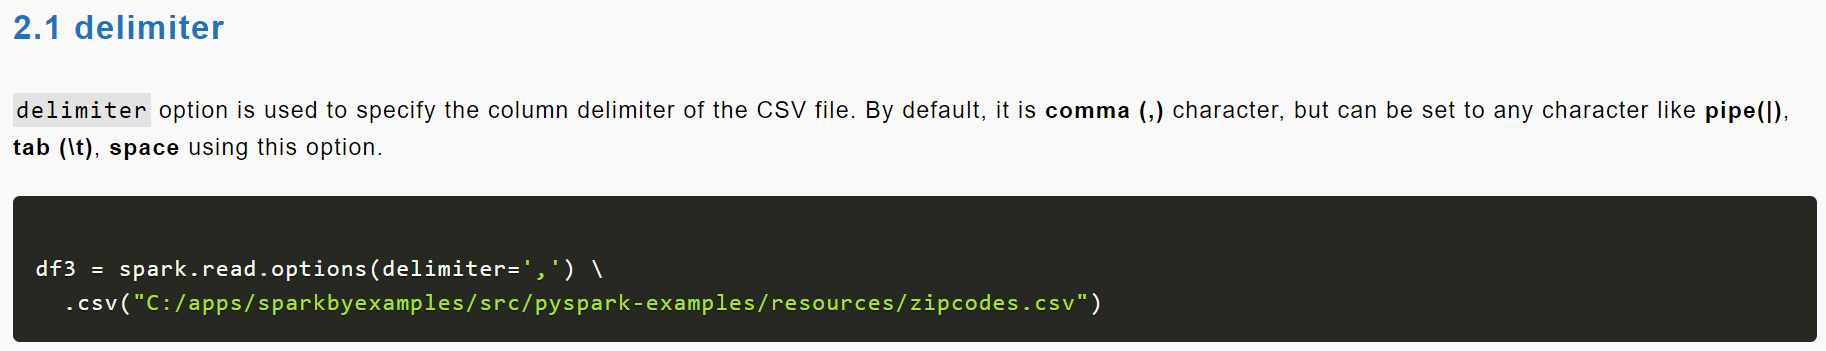

In [9]:

df = spark.read.option('delimiter',';').csv(arquivoDadosEleitorais)


## 03.2.1 - Comando Semelhante ao DataFrame.info() do Pandas

# 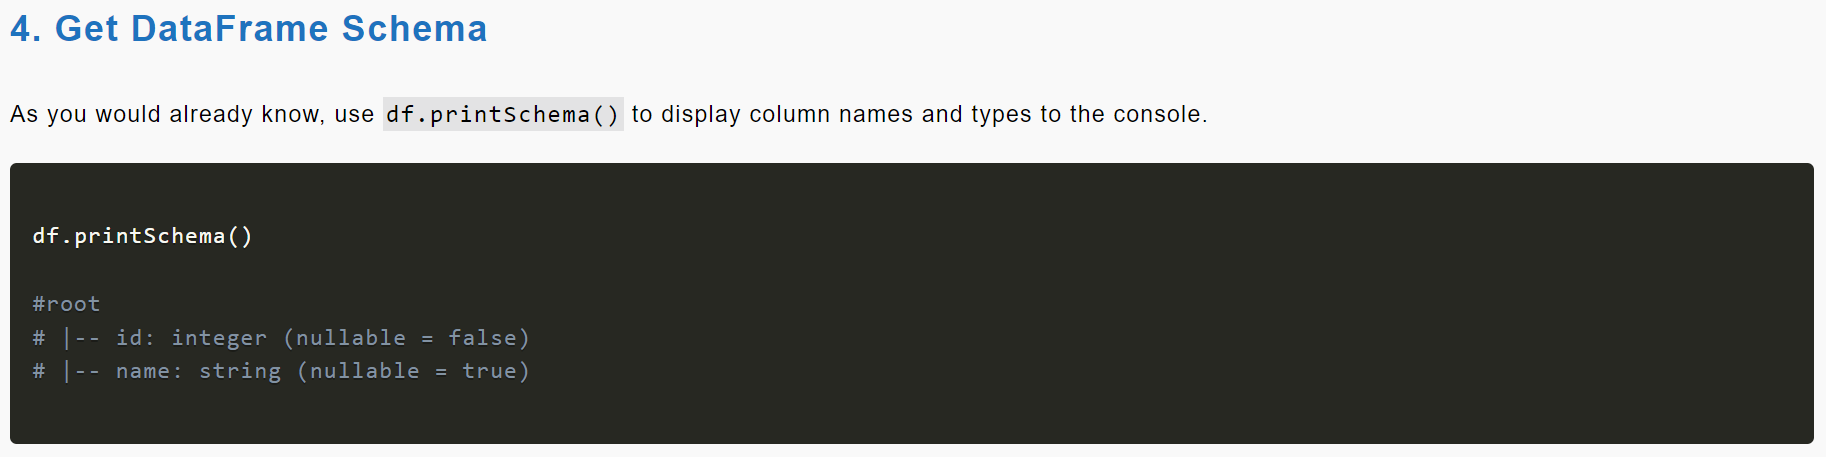

In [10]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

## 03.2.2 - Consultando a Estrutura do DataFrame Spark

In [11]:
df.summary()

summary,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20,_c21,_c22,_c23,_c24,_c25,_c26,_c27,_c28,_c29,_c30,_c31,_c32,_c33,_c34,_c35,_c36,_c37,_c38,_c39,_c40,_c41,_c42,_c43,_c44,_c45,_c46,_c47,_c48,_c49,_c50,_c51,_c52,_c53,_c54,_c55,_c56,_c57,_c58,_c59,_c60,_c61,_c62,_c63,_c64,_c65,_c66,_c67,_c68,_c69,_c70
count,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29290,29290,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315
mean,null,null,2022.0,2.0,null,1.001773896431739,545.9997270928567,null,null,null,null,null,null,6.621853039503309,null,1.520102352983276...,21369.20833049055,null,null,null,3.593280116028829E10,null,11.138500375247322,null,2.8570989970662484,null,null,33.95091082759091,null,null,-0.5352732482772736,null,null,null,1.520102790807002...,null,null,0.9989424848195402,null,null,-3.0,null,null,48.69732664140121,6.8154998498669E10,2.6705328511973803,null,6.950842600805076,null,3.212287644129085,null,1.9173773623524595,null,419.17080575834075,null,2062307.921849772,4.111891928771236,null,null,null,-1.0,6.012829357969214...,2.123558709149212,null,2.1439585181142116,null,null,null,2.2286279593368357,null,null
stddev,null,null,0.0,0.0,null,0.042080994897107316,0.07295064332436894,null,null,null,null,null,null,0.8024890691676738,null,7.340171573646939E10,22202.201761499375,null,null,null,3.091180967653085...,null,2.647933950692263,null,2.8709397081305092,null,null,21.43896899948043,null,null,1.127434840146433,null,null,null,7.340171673360342E10,null,null,0.1598458150150077,null,null,2.952749782513274...,null,null,11.345056995984976,7.781818533494855E10,0.9656185982812869,null,1.4227532942982066,null,2.479045563346378,null,1.0033527524592856,null,330.081132521777,null,2280128.230039526,1.4588008677707747,null,null,null,0.0,8.323999222021878E15,1.8581761371838326,null,2.0042129326828633,null,null,null,2.2137333331364215,null,null
min,21/01/2023,18:38:33,2022,2,ELEI��O ORDIN�RIA,1,544,DS_ELEICAO,02/10/2022,ESTADUAL,AC,AC,ACRE,1,1� SUPLENTE,100001599072,10,AAVA SANTIAGO AGUIAR,A VERA,#NULO#,-4,NM_EMAIL,12,APTO,13,CANCELADO,COLIGA��O,10,AGIR,AGIR,-1,#NULO#,#NULO#,#NULO#,100001680979,Avan�ar para faz...,#NULO#,-4,BRASILEIRA (NATUR...,AC,-3,ABADIA DOS DOURADOS,01/01/1941,18,-4,-4,DS_GENERO,-4,DS_GRAU_INSTRUCAO,-4,CASADO(A),-4,AMARELA,-4,ADMINISTRADOR,-1,-1,#NULO#,N,N,-1,06001610220226030000,-1,#NULO#,-1,#NULO#,N�O,#NULO#,-1,#NULO#,N
25%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,6.0,null,9.0001651581E10,3510.0,null,null,null,6.745374919E9,null,12.0,null,2.0,null,null,15.0,null,null,-1.0,null,null,null,9.0001683337E10,null,null,1.0,null,null,-3.0,null,null,41.0,1.6231670485E10,2.0,null,6.0,null,1.0,null,1.0,null,169.0,null,1270629.01,4.0,null,null,null,-1.0,6.006787120226150...,2.0,null,2.0,null,null,null,2.0,null,null
50%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,7.0,null,1.60001614519E11,13113.0,null,null,null,2.9168724349E10,null,12.0,null,2.0,null,null,28.0,null,null,-1.0,null,null,null,1.60001681736E11,null,null,1.0,null,null,-3.0,null,null,48.0,4.0168901759E10,2.0,null,8.0,null,3.0,null,2.0,null,265.0,null,1270629.01,5.0,null,null,null,-1.0,6.01018802022609E18,2.0,null,2.0,null,null,null,2.0,null,null
75%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,7.0,null,2.10001647987E11,35350.0,null,null,null,6.2267906287E10,null,12.0,null,2.0,null,null,45.0,null,null,-1.0,null,null,null,2.10001683229E11,null,null,1.0,null,null,-3.0,null,null,57.0,9.0463380221E10,4.0,null,8.0,null,3.0,null,3.0,null,601.0,null,3176572.53,5.0,null,null,null,-1.0,6.016593520226209...,2.0,null,2.0,null,null,null,2.0,null,null
max,DT_GER

# 03.2.3 - Formas de Aplicar o Método DataFrame.show()

In [12]:
help(df.show)

Help on method show in module pyspark.sql.dataframe:

show(n: int = 20, truncate: Union[bool, int] = True, vertical: bool = False) -> None method of pyspark.sql.dataframe.DataFrame instance
    Prints the first ``n`` rows to the console.
    
    .. versionadded:: 1.3.0
    
    Parameters
    ----------
    n : int, optional
        Number of rows to show.
    truncate : bool or int, optional
        If set to ``True``, truncate strings longer than 20 chars by default.
        If set to a number greater than one, truncates long strings to length ``truncate``
        and align cells right.
    vertical : bool, optional
        If set to ``True``, print output rows vertically (one line
        per column value).
    
    Examples
    --------
    >>> df
    DataFrame[age: int, name: string]
    >>> df.show()
    +---+-----+
    |age| name|
    +---+-----+
    |  2|Alice|
    |  5|  Bob|
    +---+-----+
    >>> df.show(truncate=3)
    +---+----+
    |age|name|
    +---+----+
    |  2| Al

### ATENÇÃO: 


* * A atribuição realizada abaixo não irá armazenar nenhum resultado no dataframe "dfexemplo" pois o método DataFrame.show() é um método de exibição de registros no console

* * Mesma observação para o método "DataFrame.printSchema()"

* * Eles sempre irão retornar "None" para o DataFrame que está recebendo a atribuição

In [13]:
dfexemplo = df.show()

type(dfexemplo)

dfexemplo

+----------+----------+-----------+---------------+-----------------+--------+----------+--------------------+----------+--------------+-----+-----+-----------------+--------+-----------------+------------+------------+--------------------+--------------------+-------------------+----------------+--------------+--------------------+--------------------+--------------------+--------------------+---------------+----------+-------------+--------------------+------------+--------------------+--------------+--------------------+------------+---------------+--------------------+----------------+----------------+----------------+--------------------+--------------------+-------------+-------------------+--------------------+---------+---------+-----------------+--------------------+---------------+---------------+-----------+-----------+-----------+--------------------+--------------------+----------------+----------------+------------+----------------+--------------------+-------------------

In [14]:
# Show full contents of DataFrame (PySpark)
df.show(truncate=False)

# Show top 5 rows and full column contents (PySpark)
df.show(5,truncate=False) 

# Shows top 5 rows and only 10 characters of each column (PySpark)
df.show(5,truncate=10) 

# Shows rows vertically (one line per column value) (PySpark)
df.show(vertical=True)

+----------+----------+-----------+---------------+-----------------+--------+----------+------------------------------+----------+--------------+-----+-----+-----------------+--------+-----------------+------------+------------+-------------------------------------------+-----------------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+----------------------------------------+------------+------------------------+--------------+-----------------------+------------+---------------+-----------------------+----------------+----------------+----------------+-----------------------+-----------------------+-------------+-------------------+-----------------------------+---------+---------+-----------------+-----------------------------+---------------+---------------+-----------+-----------+-----------+------------------------------------

+----------+----------+----------+----------+----------+--------+----------+----------+----------+----------+-----+-----+----------+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|       _c0|       _c1|       _c2|       _c3|       _c4|     _c5|       _c6|       _c7|       _c8|       _c9| _c10| _c11|      _c12|    _c13|      _c14|      _c15|      _c16|      _c17|      _c18|      _c19|      _c20|      _c21|    

# 03.2.4 - Listando TODAS as colunas de um DataFrame

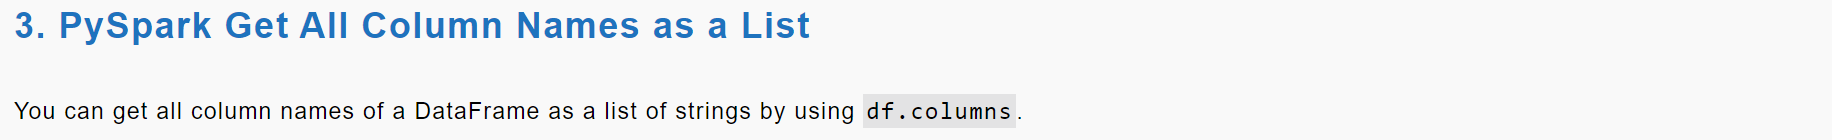
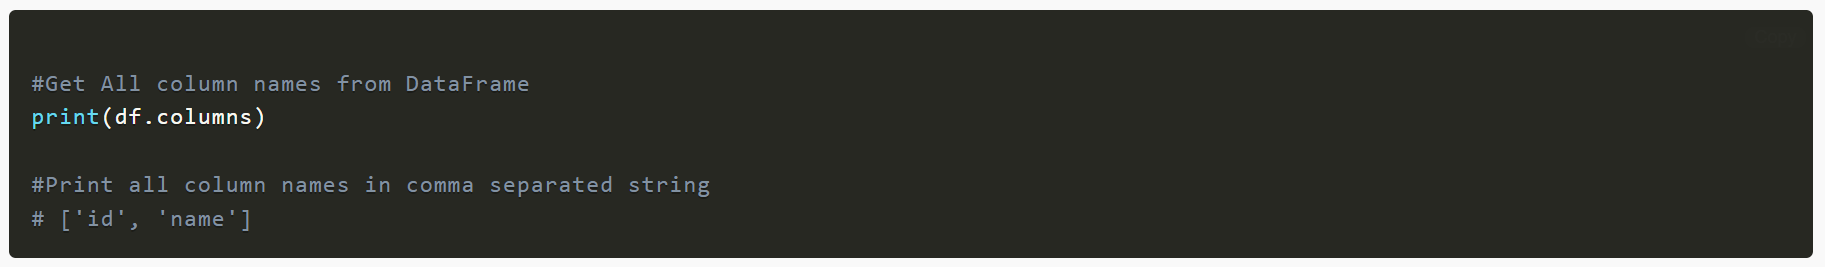

In [15]:
print(df.columns)

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c62', '_c63', '_c64', '_c65', '_c66', '_c67', '_c68', '_c69', '_c70']


# 03.2.5 - Listando DataType de uma determinad coluna de um DataFrame

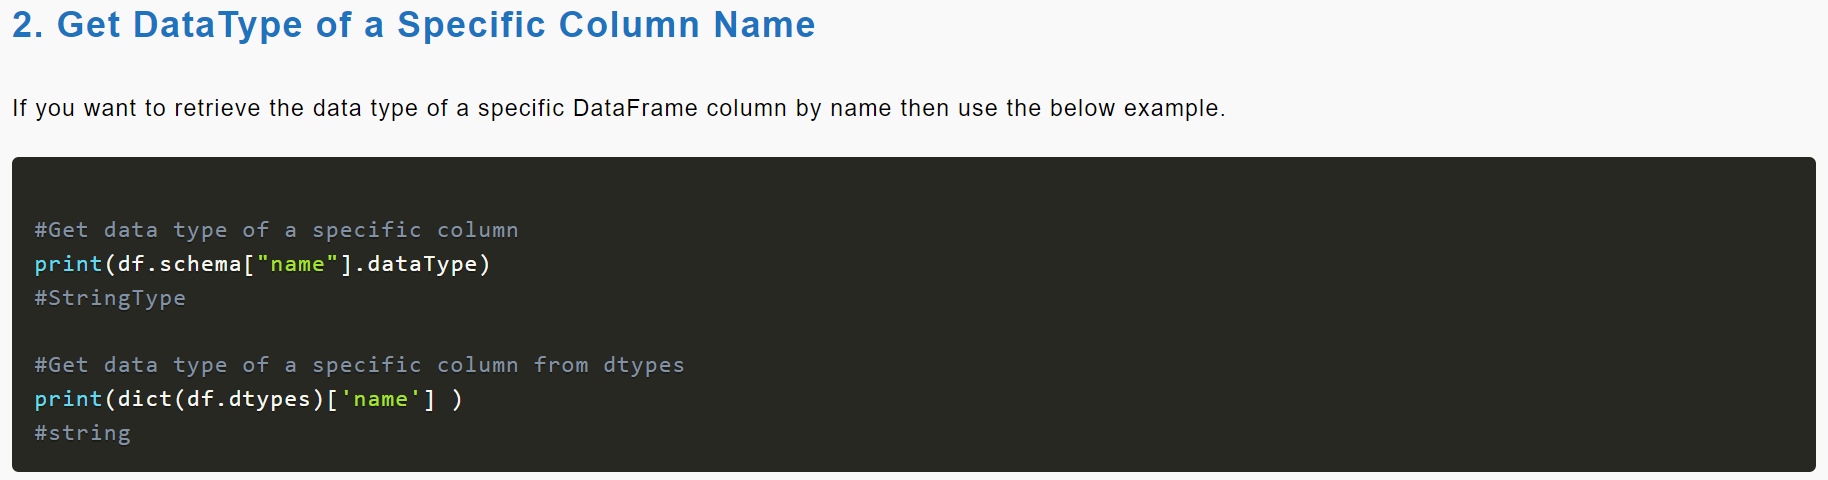

In [16]:
#Get data type of a specific column
#print(df.schema["DT_GERACAO"].dataType)
#StringType

#Get data type of a specific column from dtypes
#print(dict(df.dtypes)['DT_GERACAO'] )
#string

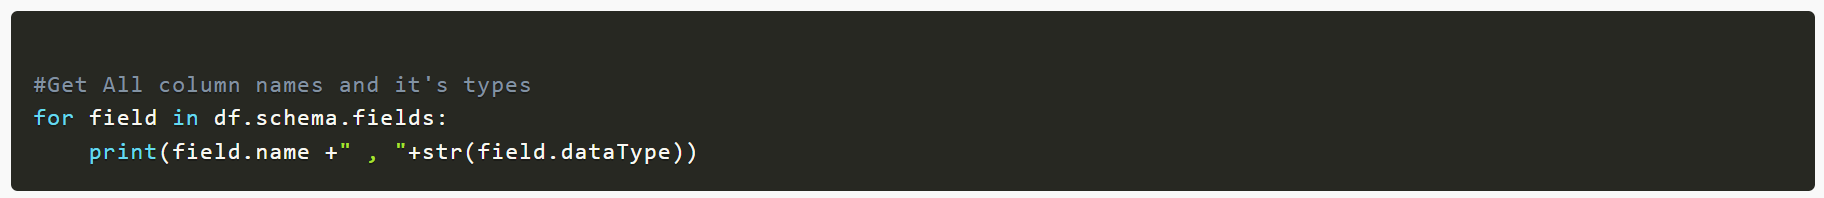

In [17]:
#Get All column names and it's types
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

_c0 , StringType()
_c1 , StringType()
_c2 , StringType()
_c3 , StringType()
_c4 , StringType()
_c5 , StringType()
_c6 , StringType()
_c7 , StringType()
_c8 , StringType()
_c9 , StringType()
_c10 , StringType()
_c11 , StringType()
_c12 , StringType()
_c13 , StringType()
_c14 , StringType()
_c15 , StringType()
_c16 , StringType()
_c17 , StringType()
_c18 , StringType()
_c19 , StringType()
_c20 , StringType()
_c21 , StringType()
_c22 , StringType()
_c23 , StringType()
_c24 , StringType()
_c25 , StringType()
_c26 , StringType()
_c27 , StringType()
_c28 , StringType()
_c29 , StringType()
_c30 , StringType()
_c31 , StringType()
_c32 , StringType()
_c33 , StringType()
_c34 , StringType()
_c35 , StringType()
_c36 , StringType()
_c37 , StringType()
_c38 , StringType()
_c39 , StringType()
_c40 , StringType()
_c41 , StringType()
_c42 , StringType()
_c43 , StringType()
_c44 , StringType()
_c45 , StringType()
_c46 , StringType()
_c47 , StringType()
_c48 , StringType()
_c49 , StringType()
_c50 , Str

In [18]:
df.collect()

[Row(_c0='DT_GERACAO', _c1='HH_GERACAO', _c2='ANO_ELEICAO', _c3='CD_TIPO_ELEICAO', _c4='NM_TIPO_ELEICAO', _c5='NR_TURNO', _c6='CD_ELEICAO', _c7='DS_ELEICAO', _c8='DT_ELEICAO', _c9='TP_ABRANGENCIA', _c10='SG_UF', _c11='SG_UE', _c12='NM_UE', _c13='CD_CARGO', _c14='DS_CARGO', _c15='SQ_CANDIDATO', _c16='NR_CANDIDATO', _c17='NM_CANDIDATO', _c18='NM_URNA_CANDIDATO', _c19='NM_SOCIAL_CANDIDATO', _c20='NR_CPF_CANDIDATO', _c21='NM_EMAIL', _c22='CD_SITUACAO_CANDIDATURA', _c23='DS_SITUACAO_CANDIDATURA', _c24='CD_DETALHE_SITUACAO_CAND', _c25='DS_DETALHE_SITUACAO_CAND', _c26='TP_AGREMIACAO', _c27='NR_PARTIDO', _c28='SG_PARTIDO', _c29='NM_PARTIDO', _c30='NR_FEDERACAO', _c31='NM_FEDERACAO', _c32='SG_FEDERACAO', _c33='DS_COMPOSICAO_FEDERACAO', _c34='SQ_COLIGACAO', _c35='NM_COLIGACAO', _c36='DS_COMPOSICAO_COLIGACAO', _c37='CD_NACIONALIDADE', _c38='DS_NACIONALIDADE', _c39='SG_UF_NASCIMENTO', _c40='CD_MUNICIPIO_NASCIMENTO', _c41='NM_MUNICIPIO_NASCIMENTO', _c42='DT_NASCIMENTO', _c43='NR_IDADE_DATA_POSSE', 

In [19]:

#split_col = split(df['DT_NASCIMENTO'], '/')
#df3 = df.select("SQ_CANDIDATO"
#                ,"DS_CARGO"
#                ,"NM_URNA_CANDIDATO"
#                ,"DT_NASCIMENTO"
#                ,split_col.getItem(0).alias('DIA')
#                ,split_col.getItem(1).alias('MES')
#                ,split_col.getItem(2).alias('ANO'))   
#df3

# Entendendo a diferença entre as funções option() e options()

# 03.3 - Importando Arquivo CSV Definindo Delimitador de Colunas e Cabeçalho

## Usando Função: option()

* Read a csv with delimiter and a header

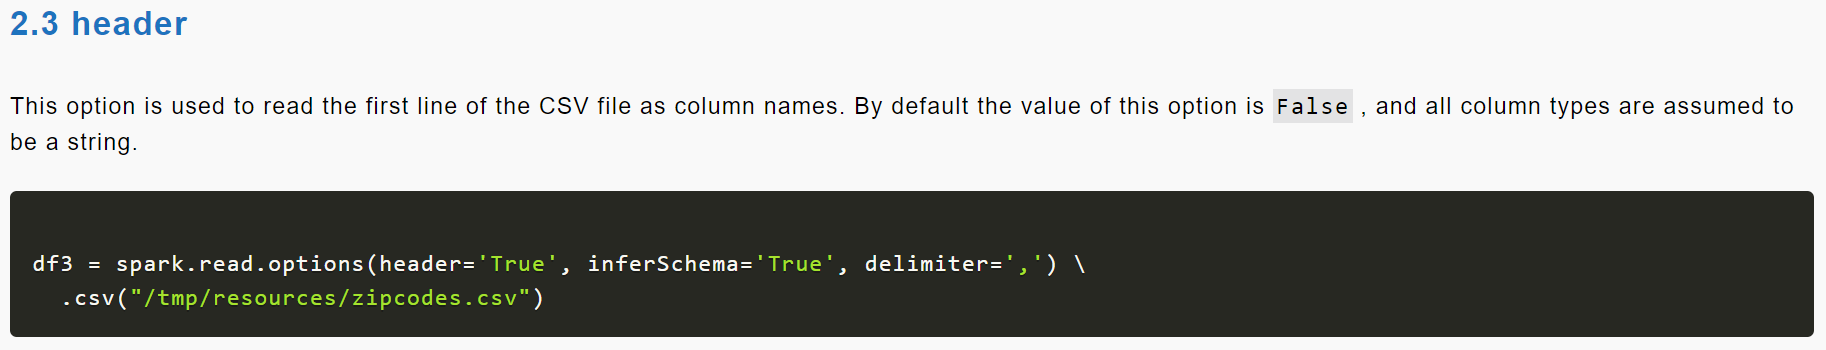

In [20]:


df = spark.read.option('delimiter',';') \
                .option('header','True') \
                .csv(arquivoDadosEleitorais)

#df.select('DT_GERACAO').show()

df.show(2,truncate=False)

+----------+----------+-----------+---------------+-----------------+--------+----------+------------------------------+----------+--------------+-----+-----+--------------+--------+-----------------+------------+------------+---------------------+---------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+------------------------------+------------+-------------------+------------+-----------------------+------------+---------------+-----------------------+----------------+----------------+----------------+-----------------------+-----------------------+-------------+-------------------+-----------------------------+---------+---------+-----------------+-------------------+---------------+---------------+-----------+-----------+-----------+-------------------------+-----------------------+----------------+----------------+------------

## Usando Função: options()

* You can also use options() to use multiple options

In [21]:


df = spark.read.options(delimiter=';'
                        , header='True') \
                        .csv(arquivoDadosEleitorais)

#df.select('DT_GERACAO').show()

df.show(2,truncate=False)

+----------+----------+-----------+---------------+-----------------+--------+----------+------------------------------+----------+--------------+-----+-----+--------------+--------+-----------------+------------+------------+---------------------+---------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+------------------------------+------------+-------------------+------------+-----------------------+------------+---------------+-----------------------+----------------+----------------+----------------+-----------------------+-----------------------+-------------+-------------------+-----------------------------+---------+---------+-----------------+-------------------+---------------+---------------+-----------+-----------+-----------+-------------------------+-----------------------+----------------+----------------+------------

# URGENTE ==> Pesquisar 

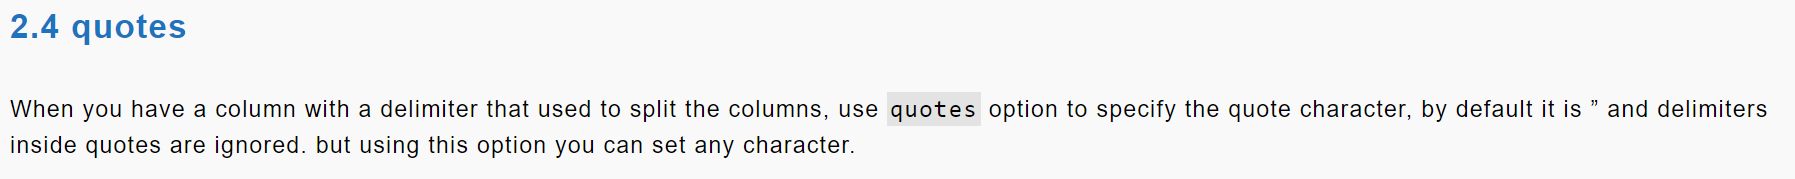

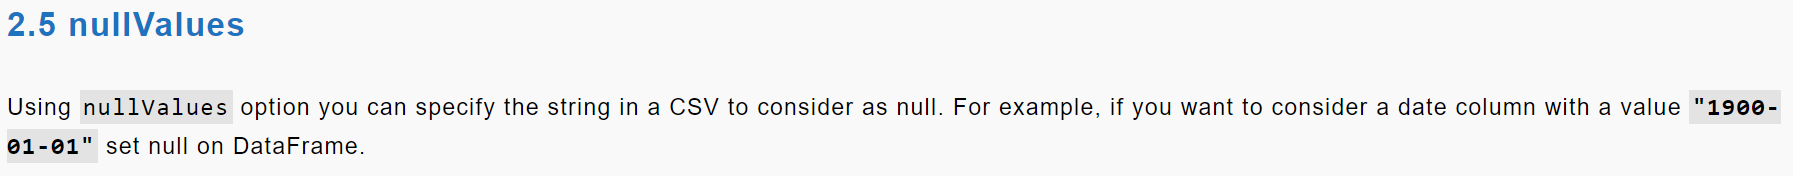

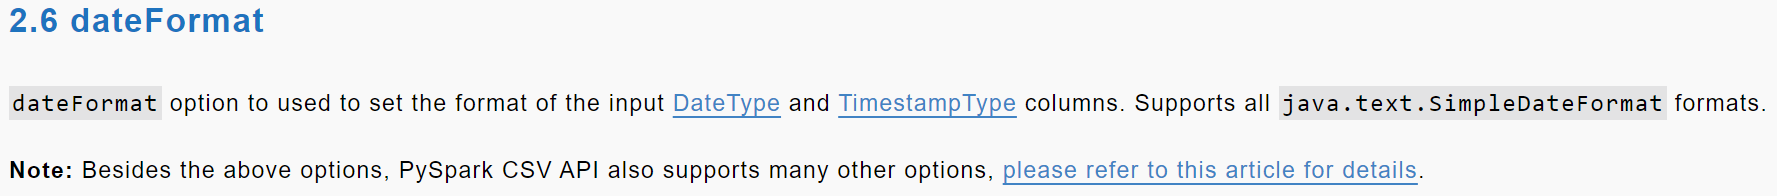 

# 03.4 - Importando TODOS os Arquivos CSV de um Diretório

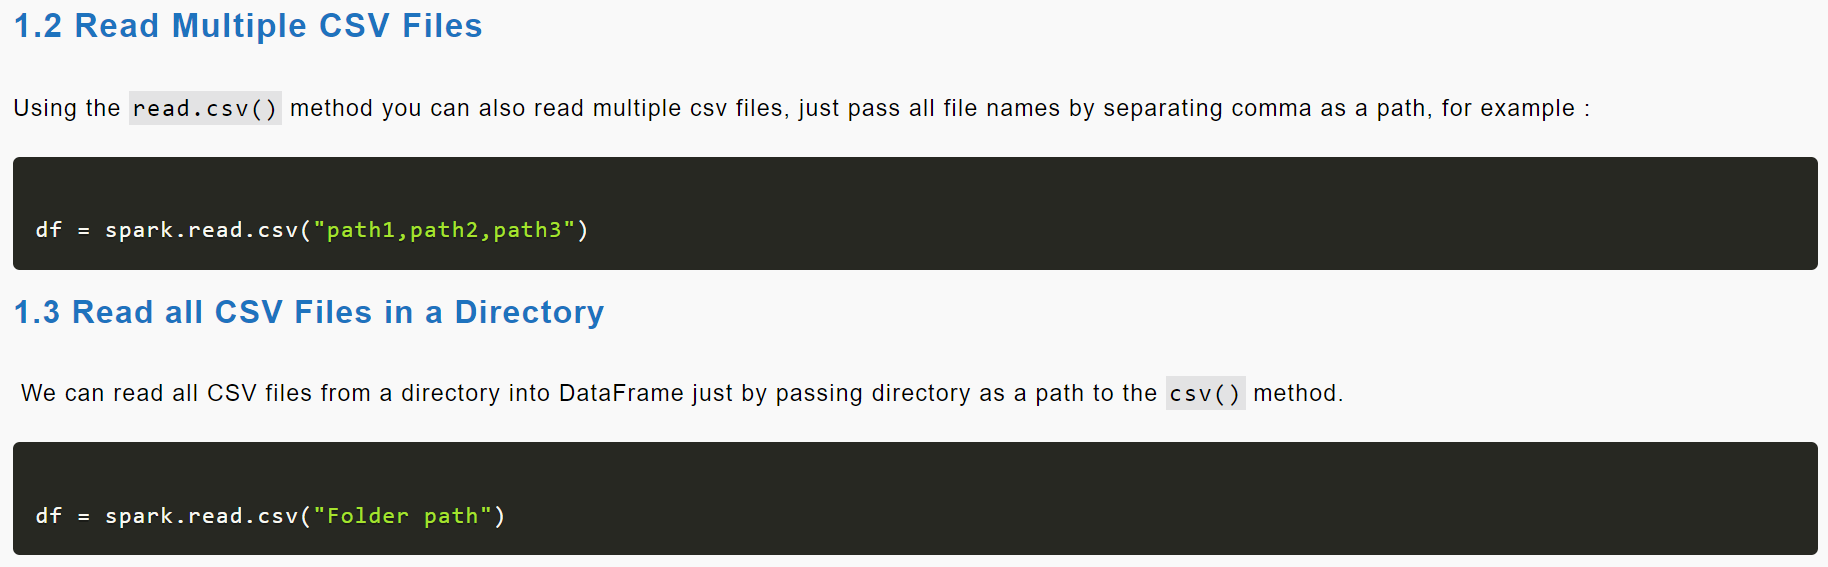

## Usando spark.read.csv()

* Read all files in a folder, please make sure only CSV files should present in the folder.

In [22]:

folderPath = "../ProjetoSparkKB/Dados/Candidato/"
df5 = spark.read.csv(folderPath,sep=';')
df5.count()

62204

## Usando spark.read.format()


In [23]:

dfExemplo2 = spark.read.format("csv").load(arquivoDadosEleitorais)
    
dfExemplo2.printSchema()

root
 |-- _c0: string (nullable = true)



# 03.5 - Importando Arquivo CSV Definindo inferSchema

## Entendendo o parâmetro inferSchema

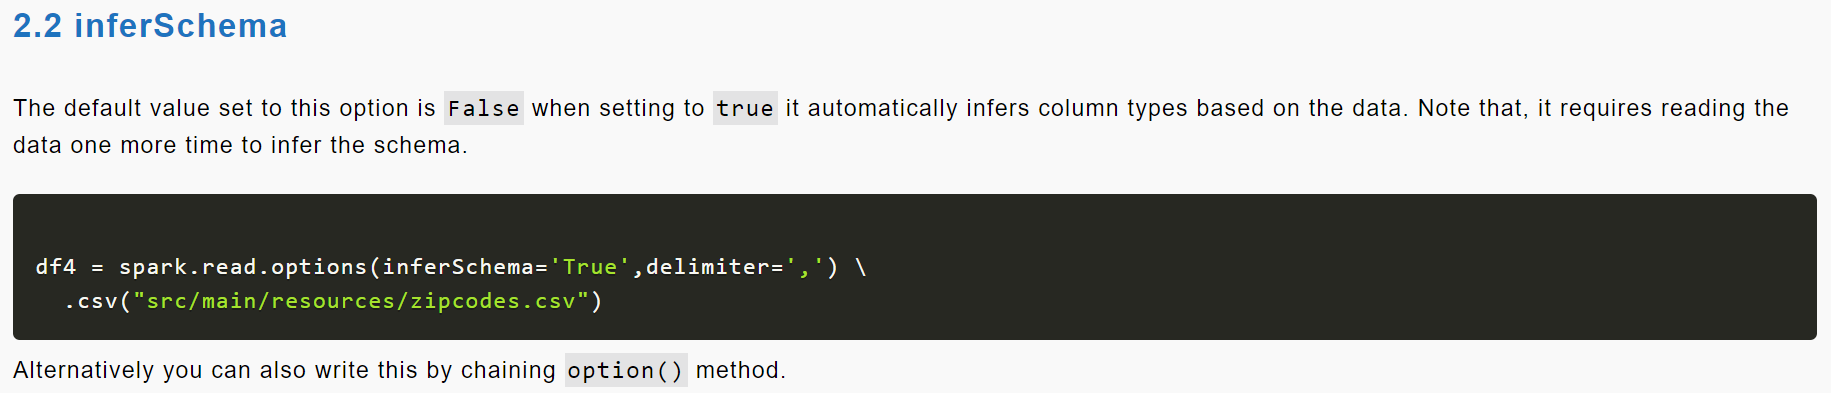

## Parâmetro inferSchema FALSE

In [24]:

dfExemplo3 = spark.read.option("inferSchema",False) \
                .option("delimiter",";") \
                .option("header",True) \
                .csv(arquivoDadosEleitorais)

dfExemplo3.printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- HH_GERACAO: string (nullable = true)
 |-- ANO_ELEICAO: string (nullable = true)
 |-- CD_TIPO_ELEICAO: string (nullable = true)
 |-- NM_TIPO_ELEICAO: string (nullable = true)
 |-- NR_TURNO: string (nullable = true)
 |-- CD_ELEICAO: string (nullable = true)
 |-- DS_ELEICAO: string (nullable = true)
 |-- DT_ELEICAO: string (nullable = true)
 |-- TP_ABRANGENCIA: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- SG_UE: string (nullable = true)
 |-- NM_UE: string (nullable = true)
 |-- CD_CARGO: string (nullable = true)
 |-- DS_CARGO: string (nullable = true)
 |-- SQ_CANDIDATO: string (nullable = true)
 |-- NR_CANDIDATO: string (nullable = true)
 |-- NM_CANDIDATO: string (nullable = true)
 |-- NM_URNA_CANDIDATO: string (nullable = true)
 |-- NM_SOCIAL_CANDIDATO: string (nullable = true)
 |-- NR_CPF_CANDIDATO: string (nullable = true)
 |-- NM_EMAIL: string (nullable = true)
 |-- CD_SITUACAO_CANDIDATURA: string (nullable = tr

## Parâmetro inferSchema TRUE

In [25]:

dfExemplo04 = spark.read.options(header='True'
                                 , inferSchema='True'
                                 , delimiter=';') \
                                 .csv(arquivoDadosEleitorais)

dfExemplo04.printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- HH_GERACAO: timestamp (nullable = true)
 |-- ANO_ELEICAO: integer (nullable = true)
 |-- CD_TIPO_ELEICAO: integer (nullable = true)
 |-- NM_TIPO_ELEICAO: string (nullable = true)
 |-- NR_TURNO: integer (nullable = true)
 |-- CD_ELEICAO: integer (nullable = true)
 |-- DS_ELEICAO: string (nullable = true)
 |-- DT_ELEICAO: string (nullable = true)
 |-- TP_ABRANGENCIA: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- SG_UE: string (nullable = true)
 |-- NM_UE: string (nullable = true)
 |-- CD_CARGO: integer (nullable = true)
 |-- DS_CARGO: string (nullable = true)
 |-- SQ_CANDIDATO: long (nullable = true)
 |-- NR_CANDIDATO: integer (nullable = true)
 |-- NM_CANDIDATO: string (nullable = true)
 |-- NM_URNA_CANDIDATO: string (nullable = true)
 |-- NM_SOCIAL_CANDIDATO: string (nullable = true)
 |-- NR_CPF_CANDIDATO: long (nullable = true)
 |-- NM_EMAIL: string (nullable = true)
 |-- CD_SITUACAO_CANDIDATURA: integer (nullabl

# 03.6 - Importando Arquivo CSV Definindo encoding

## Entendendo o parâmetro encoding

** Documentação: https://sqlrelease.com/spark-read-file-with-special-characters-using-pyspark

In [26]:

dfExemplo04 = spark.read.options(header='True'
                                 , inferSchema='True'
                                 , delimiter=';'
                                 , encoding="windows-1252") \
                                 .csv(arquivoDadosEleitorais)

dfExemplo04.show()


+----------+-------------------+-----------+---------------+-----------------+--------+----------+--------------------+----------+--------------+-----+-----+-----------------+--------+-----------------+------------+------------+--------------------+--------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+--------------------+------------+--------------------+--------------+-----------------------+------------+---------------+-----------------------+----------------+----------------+----------------+-----------------------+-----------------------+-------------+-------------------+-----------------------------+---------+---------+-----------------+--------------------+---------------+---------------+-----------+-----------+-----------+--------------------+-----------------------+----------------+----------------+------------+----------

# 03.7 - Definindo a Estrutura de um DataFrame e Importar CSV

** Documentação: https://sqlrelease.com/spark-read-file-with-special-characters-using-pyspark

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-sql-types-datatype-with-examples/

** Documentação: https://spark.apache.org/docs/latest/sql-ref-datatypes.html

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-date_format-convert-date-to-string-format/

### O arquivo "indicador_homocidio.csv" foi criado com a coluna Data do tipo "Data"
### O que permitiu a criação do DataFrame com a coluna Data do tipo DateType()

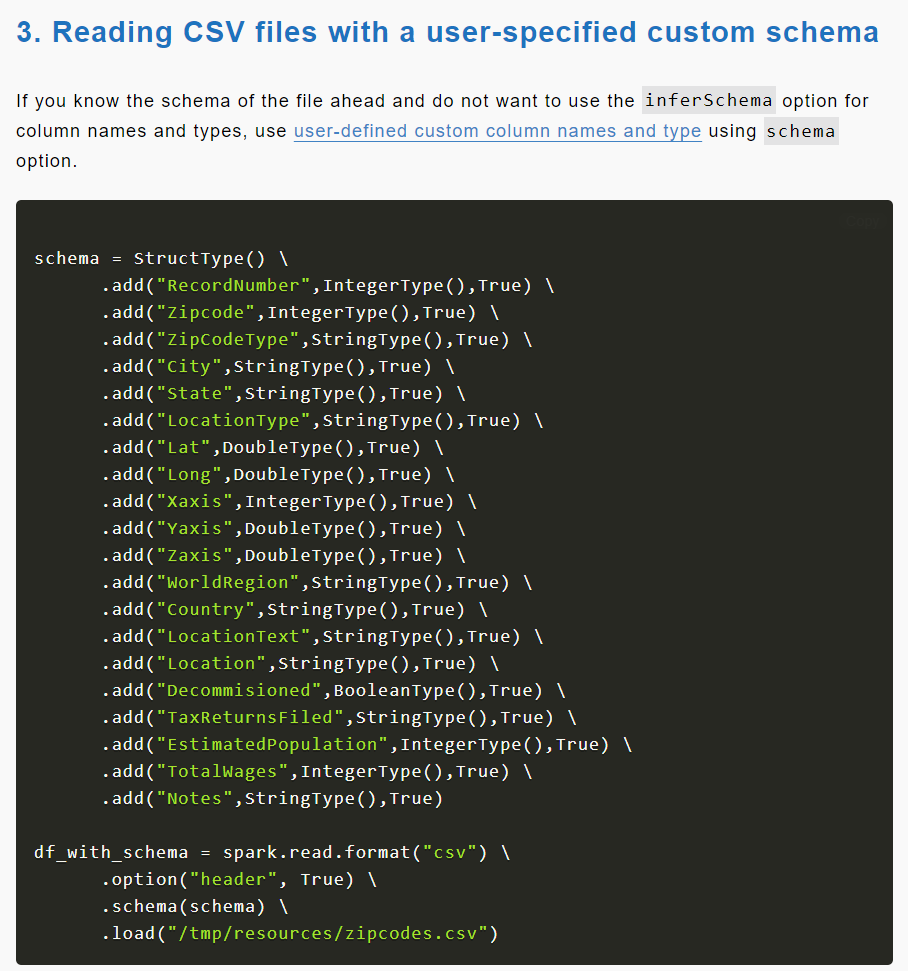

In [27]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",DateType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidio)

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: date (nullable = true)

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|            Roraima|Homicídio doloso|      1389|2023-01-28|
|              Amapá|Homicídio doloso|      1948|2023-01-29|
|               Acre|Homicídio doloso|      2007|2023-01-30|
|          Tocantins|Homicídio doloso|      2787|2023-01-31|
|           Rondônia|Homicídio doloso|      3482|2023-02-01|
|   Distrito Federal|Homicídio doloso|      3518|2023-02-02|
| Mato Grosso do Sul|Homicídio doloso|      3905|2023-02-03|
|              Piauí|Homicídio doloso|      4714|2023-02-04|
|     Santa Catarina|Homicídio doloso|      5832|2023-02-05|
|        Mato Grosso|Homicídio doloso|      6920|2023-02-06|
|            Sergipe|Homicídio doloso|      69

# 03.8 - .option("maxRowsInMemory",1000) (NOVO)

# 04 - Trabalhando com Datas - Converte coluna String (DD/MM/AAA) para Date (AAAAMMDD)

### O arquivo "indicador_homocidio_2.csv" foi criado com a coluna Data do tipo "Geral"
### Nesse caso, vamos precisar criar o DataFrame com a coluna Data do tipo StringType() e em seguida realizar a conversão da coluna para o tipo Date

* Trabalhando com Datas

** Documentação: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html

** Documentação: https://www.datasciencemadesimple.com/get-month-year-and-quarter-from-date-in-pyspark/

** Documentação: https://www.projectpro.io/recipes/explain-conversion-of-timestamp-date-pyspark-databricks#:~:text=The%20to_date()%20function%20in,SSS%22.

** Documentação: https://www.projectpro.io/recipes/explain-conversion-of-timestamp-date-pyspark-databricks#:~:text=The%20to_date()%20function%20in,SSS%22.

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-date_format-convert-date-to-string-format/

** Documentação: https://www.datasciencemadesimple.com/typecast-string-to-date-and-date-to-string-in-pyspark/

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/

In [28]:
from pyspark.sql.functions import *
from pyspark.sql.types import StringType

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)

df_with_schema2 = spark.read.options(header='True', inferSchema='False', delimiter=';', encoding="windows-1252") \
      .schema(schema) \
      .csv(arquivoIndicadorHomicidio2)

df_with_schema2.show()

print('------------------------------ ESTRUTURA ANTES DA CONVERSÃO ------------------------------')

df_with_schema2.printSchema()

print('------------------------------------------------------------------------------------------')

df_with_schema2 = df_with_schema2.withColumn('Data2', to_date(date_format(unix_timestamp(df_with_schema2.Data , "dd/mm/yyyy").cast("timestamp"),"yyyy-mm-dd")))

print('------------------------------ ESTRUTURA DEPOIS DA CONVERSÃO ------------------------------')

df_with_schema2.printSchema()

df_with_schema2.show()

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|
|              Amapá|Homicídio doloso|      1948|29/01/2023|
|               Acre|Homicídio doloso|      2007|30/01/2023|
|          Tocantins|Homicídio doloso|      2787|31/01/2023|
|           Rondônia|Homicídio doloso|      3482|01/02/2023|
|   Distrito Federal|Homicídio doloso|      3518|02/02/2023|
| Mato Grosso do Sul|Homicídio doloso|      3905|03/02/2023|
|              Piauí|Homicídio doloso|      4714|04/02/2023|
|     Santa Catarina|Homicídio doloso|      5832|05/02/2023|
|        Mato Grosso|Homicídio doloso|      6920|06/02/2023|
|            Sergipe|Homicídio doloso|      6970|07/02/2023|
|           Amazonas|Homicídio doloso|      8590|08/02/2023|
|     Espírito Santo|Homicídio doloso|      8695|09/02/2023|
|            Paraíba|Hom

# 04.1 - Trabalhando com Datas - Retornando a Data Atual

In [29]:
df_with_schema3 = df_with_schema2.select(

F.col('CodUf')
    ,F.col('TipoCrime')
    ,F.current_timestamp().alias('DthAtual')
)

In [30]:
help(F.date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]



In [31]:
df_with_schema3

CodUf,TipoCrime,DthAtual
Roraima,Homicídio doloso,2023-02-12 10:05:...
Amapá,Homicídio doloso,2023-02-12 10:05:...
Acre,Homicídio doloso,2023-02-12 10:05:...
Tocantins,Homicídio doloso,2023-02-12 10:05:...
Rondônia,Homicídio doloso,2023-02-12 10:05:...
Distrito Federal,Homicídio doloso,2023-02-12 10:05:...
Mato Grosso do Sul,Homicídio doloso,2023-02-12 10:05:...
Piauí,Homicídio doloso,2023-02-12 10:05:...
Santa Catarina,Homicídio doloso,2023-02-12 10:05:...
Mato Grosso,Homicídio doloso,2023-02-12 10:05:...


### Usando o "df. select" para tratar o valor da nova coluna

In [32]:
df_with_schema3.select(
F.col('DthAtual')
    ,F.date_format(F.col('DthAtual'),'yy-mm-dd')
    ,F.date_format(F.col('DthAtual'),'yyyy-mm-dd')
,F.date_format(F.col('DthAtual'),'dd/mm/yyyy')
    ,F.date_format(F.col('DthAtual'),'dd-mm-yyyy')
    ,F.date_format(F.col('DthAtual'),'dd.m./yyyy')
    ,F.date_format(F.col('DthAtual'),'yyyymmdd')

).show(2,False)

+-----------------------+-------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+-------------------------------+
|DthAtual               |date_format(DthAtual, yy-mm-dd)|date_format(DthAtual, yyyy-mm-dd)|date_format(DthAtual, dd/mm/yyyy)|date_format(DthAtual, dd-mm-yyyy)|date_format(DthAtual, dd.m./yyyy)|date_format(DthAtual, yyyymmdd)|
+-----------------------+-------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+-------------------------------+
|2023-02-12 10:05:42.337|23-05-12                       |2023-05-12                       |12/05/2023                       |12-05-2023                       |12.5./2023                       |20230512                       |
|2023-02-12 10:05:42.337|23-05-12                       |2023-05-12                       |12/05

### Usando o "df. select" e o "alias" para tratar o valor da nova coluna e informar um novo nome para coluna

In [33]:
df_with_schema3.select(
F.col('DthAtual')
    ,F.date_format(F.col('DthAtual'),'yy-mm-dd').alias('data_formatada')

).show(2,False)

+-----------------------+--------------+
|DthAtual               |data_formatada|
+-----------------------+--------------+
|2023-02-12 10:05:42.491|23-05-12      |
|2023-02-12 10:05:42.491|23-05-12      |
+-----------------------+--------------+
only showing top 2 rows



### Usando o "df. withColumn" para incluir a coluna no DataFrame

In [34]:
df_with_schema3.withColumn('data1',F.date_format(F.col('DthAtual'),'yy-mm-dd'))

CodUf,TipoCrime,DthAtual,data1
Roraima,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Amapá,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Acre,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Tocantins,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Rondônia,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Distrito Federal,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Mato Grosso do Sul,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Piauí,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Santa Catarina,Homicídio doloso,2023-02-12 10:05:...,23-05-12
Mato Grosso,Homicídio doloso,2023-02-12 10:05:...,23-05-12


In [35]:
help(F.to_date)

Help on function to_date in module pyspark.sql.functions:

to_date(col: 'ColumnOrName', format: Optional[str] = None) -> pyspark.sql.column.Column
    Converts a :class:`~pyspark.sql.Column` into :class:`pyspark.sql.types.DateType`
    using the optionally specified format. Specify formats according to `datetime pattern`_.
    By default, it follows casting rules to :class:`pyspark.sql.types.DateType` if the format
    is omitted. Equivalent to ``col.cast("date")``.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 2.2.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t).alias('date')).collect()
    [Row(date=datetime.date(1997, 2, 28))]
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t, 'yyyy-MM-dd HH:mm:ss').alias('date')).collect()
    [Row(date=datetime.date(1997, 2, 28))]

In [36]:
df_with_schema2

CodUf,TipoCrime,Quantidade,Data,Data2
Roraima,Homicídio doloso,1389,28/01/2023,2023-01-28
Amapá,Homicídio doloso,1948,29/01/2023,2023-01-29
Acre,Homicídio doloso,2007,30/01/2023,2023-01-30
Tocantins,Homicídio doloso,2787,31/01/2023,2023-01-31
Rondônia,Homicídio doloso,3482,01/02/2023,2023-02-01
Distrito Federal,Homicídio doloso,3518,02/02/2023,2023-02-02
Mato Grosso do Sul,Homicídio doloso,3905,03/02/2023,2023-02-03
Piauí,Homicídio doloso,4714,04/02/2023,2023-02-04
Santa Catarina,Homicídio doloso,5832,05/02/2023,2023-02-05
Mato Grosso,Homicídio doloso,6920,06/02/2023,2023-02-06


In [37]:
df_with_schema2.select(
F.col('Data')
,F.to_date(F.col('Data'), 'dd/mm/yyyy')
)

Data,"to_date(Data, dd/mm/yyyy)"
28/01/2023,2023-01-28
29/01/2023,2023-01-29
30/01/2023,2023-01-30
31/01/2023,2023-01-31
01/02/2023,2023-01-01
02/02/2023,2023-01-02
03/02/2023,2023-01-03
04/02/2023,2023-01-04
05/02/2023,2023-01-05
06/02/2023,2023-01-06


### Usando o "df. select" e o "alias" para tratar o valor da nova coluna e informar um novo nome para coluna

In [38]:
df_with_schema2.select(
F.col('Data')
,F.to_date(F.col('Data'), 'dd/mm/yyyy').alias('data_convertida')
).printSchema()

root
 |-- Data: string (nullable = true)
 |-- data_convertida: date (nullable = true)



### Usando o "df. withColumn" para incluir a coluna no DataFrame

In [39]:
df_with_schema4 = df_with_schema2.withColumn('Data', F.to_date(F.col('Data'), 'dd/mm/yyyy'))

### Retornando Ano a partir de uma Coluna Data

* * F.year()


In [40]:
df_with_schema4.select(
F.col('Data')
,F.year(F.col('Data'))
).show(2)

+----------+----------+
|      Data|year(Data)|
+----------+----------+
|2023-01-28|      2023|
|2023-01-29|      2023|
+----------+----------+
only showing top 2 rows



### Retornando Mês a partir de uma Coluna Data

* * F.month()


In [41]:
df_with_schema4.select(
F.col('Data')
,F.month(F.col('Data'))
).show(2)

+----------+-----------+
|      Data|month(Data)|
+----------+-----------+
|2023-01-28|          1|
|2023-01-29|          1|
+----------+-----------+
only showing top 2 rows



### Retornando Dia a partir de uma Coluna Data

* * F.dayofmonth()

In [42]:
df_with_schema4.select(
F.col('Data')
,F.dayofmonth(F.col('Data'))
).show(2)

+----------+----------------+
|      Data|dayofmonth(Data)|
+----------+----------------+
|2023-01-28|              28|
|2023-01-29|              29|
+----------+----------------+
only showing top 2 rows



### Retornando Ano, Mês e Dia a partir de uma Coluna Data

* * F.year()

* * F.month()

* * F.dayofmonth()

In [43]:
df_with_schema4.select(
F.col('Data')
    ,F.year(F.col('Data')).alias('Ano')
    ,F.month(F.col('Data')).alias('Mes')
,F.dayofmonth(F.col('Data')).alias('Dia')
).show(2)

+----------+----+---+---+
|      Data| Ano|Mes|Dia|
+----------+----+---+---+
|2023-01-28|2023|  1| 28|
|2023-01-29|2023|  1| 29|
+----------+----+---+---+
only showing top 2 rows



### F.date_sub() - Adição Dias em um Coluna do TIpo Data

In [44]:
help(F.date_sub)

Help on function date_sub in module pyspark.sql.functions:

date_sub(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days before `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'sub'])
    >>> df.select(date_sub(df.dt, 1).alias('prev_date')).collect()
    [Row(prev_date=datetime.date(2015, 4, 7))]
    >>> df.select(date_sub(df.dt, df.sub.cast('integer')).alias('prev_date')).collect()
    [Row(prev_date=datetime.date(2015, 4, 6))]



In [45]:
df_with_schema4.select(
F.col('Data')
    ,F.date_sub(F.col('Data'),5).alias('DataRetroativa')
).show(2)

+----------+--------------+
|      Data|DataRetroativa|
+----------+--------------+
|2023-01-28|    2023-01-23|
|2023-01-29|    2023-01-24|
+----------+--------------+
only showing top 2 rows



### F.date_add() - Adição Dias em um Coluna do TIpo Data

In [46]:
help(F.date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    >>> df.select(date_add(df.dt, df.add.cast('integer')).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 10))]



In [47]:
df_with_schema4.select(
F.col('Data')
    ,F.date_add(F.col('Data'),5).alias('DataFuura')
).show(2)

+----------+----------+
|      Data| DataFuura|
+----------+----------+
|2023-01-28|2023-02-02|
|2023-01-29|2023-02-03|
+----------+----------+
only showing top 2 rows



### F.datediff() - Cálculo entre Duas Datas

In [48]:
help(F.datediff)

Help on function datediff in module pyspark.sql.functions:

datediff(end: 'ColumnOrName', start: 'ColumnOrName') -> pyspark.sql.column.Column
    Returns the number of days from `start` to `end`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08','2015-05-10')], ['d1', 'd2'])
    >>> df.select(datediff(df.d2, df.d1).alias('diff')).collect()
    [Row(diff=32)]



In [49]:
df_with_schema4.select(
F.datediff(F.date_add(F.col('Data'),5)
           , F.col('Data')
          ).alias('DiferencaDias') 
    
).show(2)

+-------------+
|DiferencaDias|
+-------------+
|            5|
|            5|
+-------------+
only showing top 2 rows



### F.col().cast() - Convertendo o Tipo de Dado de uma Coluna

* F.col().cast('int') - Convertendo para Inteiro
* F.col().cast('float') - Convertendo para Float

In [50]:
df_with_schema2 = spark.read.options(header='True'
                                     , inferSchema='False'
                                     , delimiter=';'
                                     , encoding="windows-1252") \
      .csv(arquivoIndicadorHomicidio2)

df_with_schema2.printSchema()

df_with_schema3 = df_with_schema2.select('Qtd',F.col('Qtd').cast('int').alias('Qtd_t'))

df_with_schema3.printSchema()

root
 |-- CodUf: string (nullable = true)
 |-- TpoCrime: string (nullable = true)
 |-- Qtd: string (nullable = true)
 |-- Data: string (nullable = true)

root
 |-- Qtd: string (nullable = true)
 |-- Qtd_t: integer (nullable = true)



In [51]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)



df_with_schema2 = spark.read.options(header='True'
                                     , inferSchema='False'
                                     , delimiter=';'
                                     , encoding="windows-1252") \
        .schema(schema) \
      .csv(arquivoIndicadorHomicidio2)

df_with_schema2.printSchema()


df_with_schema2.groupBy().sum('Quantidade').show()

df_with_schema2.groupBy().sum('Quantidade').take(1)[0][0]


df_with_schema2.groupBy().avg('Quantidade').show()

df_with_schema2.groupBy().avg('Quantidade').take(1)[0][0]

df_with_schema2.groupBy(F.col('TipoCrime')).count().show()

df_with_schema2.groupBy(F.col('TipoCrime')).sum('Quantidade').show()

df_with_schema2.groupBy(F.year(F.to_date('Data' ,'dd/mm/yyyy')).alias('Ano')).sum('Quantidade').show()

df_with_schema2.groupBy(F.month(F.to_date('Data' ,'dd/mm/yyyy')).alias('Mes')).sum('Quantidade').show()

df_with_schema2.groupBy(F.dayofmonth(F.to_date('Data' ,'dd/mm/yyyy')).alias('Dia')).sum('Quantidade').show()



root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+---------------+
|sum(Quantidade)|
+---------------+
|         345616|
+---------------+

+------------------+
|   avg(Quantidade)|
+------------------+
|12800.592592592593|
+------------------+

+----------------+-----+
|       TipoCrime|count|
+----------------+-----+
|Homicídio doloso|   27|
+----------------+-----+

+----------------+---------------+
|       TipoCrime|sum(Quantidade)|
+----------------+---------------+
|Homicídio doloso|         345616|
+----------------+---------------+

+----+---------------+
| Ano|sum(Quantidade)|
+----+---------------+
|2023|         345616|
+----+---------------+

+---+---------------+
|Mes|sum(Quantidade)|
+---+---------------+
|  1|         345616|
+---+---------------+

+---+---------------+
|Dia|sum(Quantidade)|
+---+---------------+
| 31|           2787|
| 28|           1389|
|

In [52]:
df_with_schema2.groupBy(F.year(F.to_date('Data' ,'dd/mm/yyyy')).alias('Ano')) \
                .agg(sum('Quantidade').alias('Soma') \
                     , count('Quantidade').alias('Quantidade') \
                     , min('Quantidade').alias('Menor') \
                     , max('Quantidade').alias('Maior')) \
                    .show()

+----+------+----------+-----+-----+
| Ano|  Soma|Quantidade|Menor|Maior|
+----+------+----------+-----+-----+
|2023|345616|        27| 1389|42418|
+----+------+----------+-----+-----+



### orderBy('Soma') com orderBy('Soma', ascending=True) - Default
### orderBy('Soma') com orderBy('Soma', ascending=False) - Default


### orderBy(F.col('Soma').asc()) 
### orderBy(F.col('Soma').desc())

In [53]:
df_with_schema2.groupBy(F.to_date('Data' ,'dd/mm/yyyy')) \
                .agg(sum('Quantidade').alias('Soma') \
                     , count('Quantidade').alias('Quantidade') \
                     , min('Quantidade').alias('Menor') \
                     , max('Quantidade').alias('Maior')) \
                    .orderBy('Soma') \
                    .show(5)


df_with_schema2.groupBy(F.to_date('Data' ,'dd/mm/yyyy')) \
                .agg(sum('Quantidade').alias('Soma') \
                     , count('Quantidade').alias('Quantidade') \
                     , min('Quantidade').alias('Menor') \
                     , max('Quantidade').alias('Maior')) \
                    .orderBy('Soma', ascending=False) \
                    .show(5)


df_with_schema2.groupBy(F.to_date('Data' ,'dd/mm/yyyy')) \
                .agg(sum('Quantidade').alias('Soma') \
                     , count('Quantidade').alias('Quantidade') \
                     , min('Quantidade').alias('Menor') \
                     , max('Quantidade').alias('Maior')) \
                    .orderBy(F.col('Soma').asc()) \
                    .show(5)

df_with_schema2.groupBy(F.to_date('Data' ,'dd/mm/yyyy')) \
                .agg(sum('Quantidade').alias('Soma') \
                     , count('Quantidade').alias('Quantidade') \
                     , min('Quantidade').alias('Menor') \
                     , max('Quantidade').alias('Maior')) \
                    .orderBy(F.col('Soma').desc()) \
                    .show(5)

+-------------------------+----+----------+-----+-----+
|to_date(Data, dd/mm/yyyy)|Soma|Quantidade|Menor|Maior|
+-------------------------+----+----------+-----+-----+
|               2023-01-28|1389|         1| 1389| 1389|
|               2023-01-29|1948|         1| 1948| 1948|
|               2023-01-30|2007|         1| 2007| 2007|
|               2023-01-31|2787|         1| 2787| 2787|
|               2023-01-01|3482|         1| 3482| 3482|
+-------------------------+----+----------+-----+-----+
only showing top 5 rows

+-------------------------+-----+----------+-----+-----+
|to_date(Data, dd/mm/yyyy)| Soma|Quantidade|Menor|Maior|
+-------------------------+-----+----------+-----+-----+
|               2023-01-23|42418|         1|42418|42418|
|               2023-01-22|31763|         1|31763|31763|
|               2023-01-21|28965|         1|28965|28965|
|               2023-01-20|27435|         1|27435|27435|
|               2023-01-19|24207|         1|24207|24207|
+--------------

In [54]:
df_with_schema2.orderBy(F.col('CodUf').desc(), F.col('Quantidade').asc())

CodUf,TipoCrime,Quantidade,Data
Tocantins,Homicídio doloso,2787,31/01/2023
São Paulo,Homicídio doloso,17211,17/02/2023
Sergipe,Homicídio doloso,6970,07/02/2023
Santa Catarina,Homicídio doloso,5832,05/02/2023
Roraima,Homicídio doloso,1389,28/01/2023
Rondônia,Homicídio doloso,3482,01/02/2023
Rio de Janeiro,Homicídio doloso,31763,22/02/2023
Rio Grande do Sul,Homicídio doloso,16995,16/02/2023
Rio Grande do Norte,Homicídio doloso,10242,11/02/2023
Piauí,Homicídio doloso,4714,04/02/2023


In [55]:
df_with_schema2

CodUf,TipoCrime,Quantidade,Data
Roraima,Homicídio doloso,1389,28/01/2023
Amapá,Homicídio doloso,1948,29/01/2023
Acre,Homicídio doloso,2007,30/01/2023
Tocantins,Homicídio doloso,2787,31/01/2023
Rondônia,Homicídio doloso,3482,01/02/2023
Distrito Federal,Homicídio doloso,3518,02/02/2023
Mato Grosso do Sul,Homicídio doloso,3905,03/02/2023
Piauí,Homicídio doloso,4714,04/02/2023
Santa Catarina,Homicídio doloso,5832,05/02/2023
Mato Grosso,Homicídio doloso,6920,06/02/2023


# 04.2 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Ano

In [56]:

df_with_schema2 = df_with_schema2.withColumn("Ano", date_format(col("Data"), "y"))


df_with_schema2.printSchema()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)
 |-- Ano: string (nullable = true)



# 04.3 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Mês

In [57]:

df_with_schema2 = df_with_schema2.withColumn("NumMes", date_format(col("Data"), "M"))

df_with_schema2 = df_with_schema2.withColumn("NomMes", date_format(col("Data"), "L"))


df_with_schema2.printSchema()

df_with_schema2.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)
 |-- Ano: string (nullable = true)
 |-- NumMes: string (nullable = true)
 |-- NomMes: string (nullable = true)

+-------------------+----------------+----------+----------+----+------+------+
|              CodUf|       TipoCrime|Quantidade|      Data| Ano|NumMes|NomMes|
+-------------------+----------------+----------+----------+----+------+------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|null|  null|  null|
|              Amapá|Homicídio doloso|      1948|29/01/2023|null|  null|  null|
|               Acre|Homicídio doloso|      2007|30/01/2023|null|  null|  null|
|          Tocantins|Homicídio doloso|      2787|31/01/2023|null|  null|  null|
|           Rondônia|Homicídio doloso|      3482|01/02/2023|null|  null|  null|
|   Distrito Federal|Homicídio doloso|      3518|02/02/2023|null|  null|  null|
| Mato

# 04.4 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Dia

In [58]:

df_with_schema2 = df_with_schema2.withColumn("NumDiaAno", date_format(col("Data"), "D"))

df_with_schema2 = df_with_schema2.withColumn("NumDiaMes", date_format(col("Data"), "d"))

df_with_schema2.printSchema()

df_with_schema2.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)
 |-- Ano: string (nullable = true)
 |-- NumMes: string (nullable = true)
 |-- NomMes: string (nullable = true)
 |-- NumDiaAno: string (nullable = true)
 |-- NumDiaMes: string (nullable = true)

+-------------------+----------------+----------+----------+----+------+------+---------+---------+
|              CodUf|       TipoCrime|Quantidade|      Data| Ano|NumMes|NomMes|NumDiaAno|NumDiaMes|
+-------------------+----------------+----------+----------+----+------+------+---------+---------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|null|  null|  null|     null|     null|
|              Amapá|Homicídio doloso|      1948|29/01/2023|null|  null|  null|     null|     null|
|               Acre|Homicídio doloso|      2007|30/01/2023|null|  null|  null|     null|     null|
|          Tocantins|Homicídio doloso|      

# 05 - Manipulando informações de um DataFrame

## 05.1 - Tratando Valores Nulos

In [59]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.fillna(0) # ==> NÃO FUNCIONA PARA A COLUNA DATA 

#df_with_schema = df_with_schema.fillna('0') # ==> NÃO FUNCIONA PARA A COLUNA QUANTIDADE 

#df_with_schema = df_with_schema.na.fill(0) # ==> NÃO FUNCIONA PARA A COLUNA DATA

#df_with_schema = df_with_schema.na.fill('0') # ==> NÃO FUNCIONA PARA A COLUNA QUANTIDADE 

#df_with_schema = df_with_schema.na.fill('0', ["Data"]) # ==> FUNCIONA

# df_with_schema = df_with_schema.na.fill(0, ["Data"]) # ==> NÃO FUNCIONA DEVIDO AO TIPO DE DADO

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|
|              Amapá|Homicídio doloso|      1948|29/01/2023|
|               Acre|Homicídio doloso|      2007|30/01/2023|
|          Tocantins|Homicídio doloso|      null|31/01/2023|
|           Rondônia|Homicídio doloso|      3482|01/02/2023|
|   Distrito Federal|Homicídio doloso|      3518|02/02/2023|
| Mato Grosso do Sul|Homicídio doloso|      3905|03/02/2023|
|              Piauí|Homicídio doloso|      4714|04/02/2023|
|     Santa Catarina|Homicídio doloso|      5832|05/02/2023|
|        Mato Grosso|Homicídio doloso|      6920|06/02/2023|
|            Sergipe|Homicídio doloso|      

## 05.2 - Filtrando Valores 

### 05.2.1 - Semelhante a cláusula LIKE - "CONTÉM" de Bancos de Dados

In [60]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].contains('P'))


## CONTÉM
df_with_schema.filter(df_with_schema.CodUf.like("%Ri%")).show()

## INICIA COM 
df_with_schema.filter(df_with_schema.CodUf.like("Ri%")).show()

## TERMINA COM
df_with_schema.filter(df_with_schema.CodUf.like("%lo")).show()

df_with_schema.printSchema()

df_with_schema.show()





+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|Rio Grande do Norte|Homicídio doloso|     10242|11/02/2023|
|  Rio Grande do Sul|Homicídio doloso|     16995|16/02/2023|
|     Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+-------------------+----------------+----------+----------+

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|Rio Grande do Norte|Homicídio doloso|     10242|11/02/2023|
|  Rio Grande do Sul|Homicídio doloso|     16995|16/02/2023|
|     Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+-------------------+----------------+----------+----------+

+---------+----------------+----------+----------+
|    CodUf|       TipoCrime|Quantidade|      Data|
+---------+----------------+----------+---

In [61]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].contains('P'))

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+----------+----------------+----------+----------+
|     CodUf|       TipoCrime|Quantidade|      Data|
+----------+----------------+----------+----------+
|     Piauí|Homicídio doloso|      4714|04/02/2023|
|   Paraíba|Homicídio doloso|      8902|10/02/2023|
|    Paraná|Homicídio doloso|     15708|15/02/2023|
| São Paulo|Homicídio doloso|     17211|17/02/2023|
|      Pará|Homicídio doloso|     22822|18/02/2023|
|Pernambuco|Homicídio doloso|     28965|21/02/2023|
+----------+----------------+----------+----------+



### 05.2.2 - Semelhante a cláusula LIKE - "INICIA COM" de Bancos de Dados

In [62]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].startswith('R'))

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|
|           Rondônia|Homicídio doloso|      3482|01/02/2023|
|Rio Grande do Norte|Homicídio doloso|     10242|11/02/2023|
|  Rio Grande do Sul|Homicídio doloso|     16995|16/02/2023|
|     Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+-------------------+----------------+----------+----------+



### 05.2.3 - Semelhante a cláusula LIKE - "TERMINA COM" de Bancos de Dados

In [63]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].endswith('o'))

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+--------------+----------------+----------+----------+
|         CodUf|       TipoCrime|Quantidade|      Data|
+--------------+----------------+----------+----------+
|   Mato Grosso|Homicídio doloso|      6920|06/02/2023|
|Espírito Santo|Homicídio doloso|      8695|09/02/2023|
|      Maranhão|Homicídio doloso|     13412|13/02/2023|
|     São Paulo|Homicídio doloso|     17211|17/02/2023|
|    Pernambuco|Homicídio doloso|     28965|21/02/2023|
|Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+--------------+----------------+----------+----------+



### 05.2.4 - Semelhante a cláusula WHERE de Bancos de Dados

#### WHERE com uma Condição

In [64]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf']=='Rio de Janeiro')

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+--------------+----------------+----------+----------+
|         CodUf|       TipoCrime|Quantidade|      Data|
+--------------+----------------+----------+----------+
|Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+--------------+----------------+----------+----------+



In [65]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)

df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema1 = df_with_schema.where(df_with_schema['Quantidade'] > 10000)

df_with_schema2 = df_with_schema.where(df_with_schema['Quantidade'] >= 10000)

df_with_schema3 = df_with_schema.where(df_with_schema['Quantidade'] != 10000)

df_with_schema4 = df_with_schema.where(df_with_schema['Quantidade'] < 10000)

df_with_schema5 = df_with_schema.where(df_with_schema['Quantidade'] <= 10000)

#df_with_schema.printSchema()

print('--------------------------- MAIOR QUE 10000 ---------------------------')

df_with_schema1.show()

print('--------------------------- MAIOR IGUAL QUE 10000 ---------------------------')

df_with_schema2.show()

print('--------------------------- DIFERENTE DE 10000 ---------------------------')

df_with_schema3.show()

print('--------------------------- MENOR QUE 10000 ---------------------------')

df_with_schema4.show()

print('--------------------------- MENOR IGUAL QUE 10000 ---------------------------')

df_with_schema5.show()

--------------------------- MAIOR QUE 10000 ---------------------------
+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|Rio Grande do Norte|Homicídio doloso|     10242|11/02/2023|
|            Alagoas|Homicídio doloso|     10267|12/02/2023|
|           Maranhão|Homicídio doloso|     13412|13/02/2023|
|              Goiás|Homicídio doloso|     14512|      null|
|             Paraná|Homicídio doloso|     15708|15/02/2023|
|  Rio Grande do Sul|Homicídio doloso|     16995|16/02/2023|
|          São Paulo|Homicídio doloso|     17211|17/02/2023|
|               Pará|Homicídio doloso|     22822|18/02/2023|
|       Minas Gerais|Homicídio doloso|     24207|19/02/2023|
|              Ceará|Homicídio doloso|     27435|20/02/2023|
|         Pernambuco|Homicídio doloso|     28965|21/02/2023|
|     Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
|            

#### WHERE com MULTIPLAS Condições

In [66]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo')) 

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+--------------+----------------+----------+----------+
|         CodUf|       TipoCrime|Quantidade|      Data|
+--------------+----------------+----------+----------+
|     São Paulo|Homicídio doloso|     17211|17/02/2023|
|Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+--------------+----------------+----------+----------+



#### Quando ocorrer a necessidade de filtrar vários valores na mesma coluna, devemos usaro a cláusula ISIN quando for em campos diferentes devemos usar a cláusula WHERE com MULTIPLAS Condições

#### ISNOTIN

In [67]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.where(~df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo'))

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo')==False)

df_with_schema.printSchema()

df_with_schema.show()



root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+-------------------+----------------+----------+----------+
|              CodUf|       TipoCrime|Quantidade|      Data|
+-------------------+----------------+----------+----------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|
|              Amapá|Homicídio doloso|      1948|29/01/2023|
|               Acre|Homicídio doloso|      2007|30/01/2023|
|          Tocantins|Homicídio doloso|      null|31/01/2023|
|           Rondônia|Homicídio doloso|      3482|01/02/2023|
|   Distrito Federal|Homicídio doloso|      3518|02/02/2023|
| Mato Grosso do Sul|Homicídio doloso|      3905|03/02/2023|
|              Piauí|Homicídio doloso|      4714|04/02/2023|
|     Santa Catarina|Homicídio doloso|      5832|05/02/2023|
|        Mato Grosso|Homicídio doloso|      6920|06/02/2023|
|            Sergipe|Homicídio doloso|      

### 05.2.5 - Semelhante a cláusula IN de Bancos de Dados

In [68]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro'))

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+--------------+----------------+----------+----------+
|         CodUf|       TipoCrime|Quantidade|      Data|
+--------------+----------------+----------+----------+
|Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+--------------+----------------+----------+----------+



In [69]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo'))

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin(['Rio de Janeiro','São Paulo']))

df_with_schema.printSchema()

df_with_schema.show()

root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)

+--------------+----------------+----------+----------+
|         CodUf|       TipoCrime|Quantidade|      Data|
+--------------+----------------+----------+----------+
|     São Paulo|Homicídio doloso|     17211|17/02/2023|
|Rio de Janeiro|Homicídio doloso|     31763|22/02/2023|
+--------------+----------------+----------+----------+



## 05.3 - Tratando Valores com UPPER, LOWER e INITCAPT

In [70]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.withColumn("CodUf_upper", upper(col("CodUf")))

df_with_schema = df_with_schema.withColumn("CodUf_lower", lower(col("CodUf")))

df_with_schema = df_with_schema.withColumn("CodUf_incap", initcap(col("CodUf")))

df_with_schema.printSchema()

df_with_schema.show()


root
 |-- CodUf: string (nullable = true)
 |-- TipoCrime: string (nullable = true)
 |-- Quantidade: integer (nullable = true)
 |-- Data: string (nullable = true)
 |-- CodUf_upper: string (nullable = true)
 |-- CodUf_lower: string (nullable = true)
 |-- CodUf_incap: string (nullable = true)

+-------------------+----------------+----------+----------+-------------------+-------------------+-------------------+
|              CodUf|       TipoCrime|Quantidade|      Data|        CodUf_upper|        CodUf_lower|        CodUf_incap|
+-------------------+----------------+----------+----------+-------------------+-------------------+-------------------+
|            Roraima|Homicídio doloso|      1389|28/01/2023|            RORAIMA|            roraima|            Roraima|
|              Amapá|Homicídio doloso|      1948|29/01/2023|              AMAPÁ|              amapá|              Amapá|
|               Acre|Homicídio doloso|      2007|30/01/2023|               ACRE|               acre|   

# 06 - Transformando o DataFrame Spark em Tabela Temporária

In [71]:
df.createOrReplaceTempView('teste')

## 06.1 - Lendo a Tabela e Transformando em outro DataFrame Spark

In [72]:
df2 = spark.sql("""
SELECT DT_GERACAO 
FROM TESTE
""")

# 07 - Convertendo DataType de um DataFrame Spark

## 07.1 -  De uma Coluna 

In [73]:
df2.withColumn("DT_GERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

root
 |-- DT_GERACAO: timestamp (nullable = true)



## 07.2 - Criando uma nova Coluna

In [74]:
df2.withColumn("DTGERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- DTGERACAO: timestamp (nullable = true)



# 08 - Renomeando Coluna(s) em DataFrame Spark

## 08.1 - Uma Única Coluna

In [75]:
df2.withColumnRenamed("DT_GERACAO","DT_GERACAO2").printSchema()

root
 |-- DT_GERACAO2: string (nullable = true)



## 08.2 - Várias Colunas

In [76]:
df3 = spark.sql("""
SELECT DT_GERACAO , HH_GERACAO
FROM TESTE
""")

df3 = df3.withColumnRenamed("DT_GERACAO","DtGeracao") \
            .withColumnRenamed("HH_GERACAO","HrGeracao")
df3.printSchema()


root
 |-- DtGeracao: string (nullable = true)
 |-- HrGeracao: string (nullable = true)



# 09 - Ordenando um DataFrame Spark

## 09.1 - Ordenando um DataFrame Spark por uma Coluna

In [77]:
df4 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO
FROM TESTE
""")

df4.show()

df4.sort("SG_UF").show(truncate=False)


+-----+--------------------+
|SG_UF|   NM_URNA_CANDIDATO|
+-----+--------------------+
|   CE|    TONY IN�CIO SHOW|
|   RJ|ENFERMEIRA SONIA ...|
|   RS|       TANGER JARDIM|
|   SP|  VAVA DO TRANSPORTE|
|   AM|           LEDA MAIA|
|   AL|        �TALO BASTOS|
|   MG|     CARCILEI SOARES|
|   RJ|PAI MARCELO DE OX...|
|   PR|            DR MAGNO|
|   ES|       VANETE CARIRI|
|   PR|       RONNIE CASTRO|
|   PA|      ELIEL FAUSTINO|
|   RJ|        MARCOS UCH�A|
|   ES|IDELFONSO DA VITORIA|
|   AP|PAULO CUNHA COLET...|
|   SE|GILENO PAO FILHO ...|
|   AM|      DR GEORGE LINS|
|   AP|      ALDILENE SOUZA|
|   BA|MISSIONARIA SIMON...|
|   RJ|KARLA DE LUCAS DO...|
+-----+--------------------+
only showing top 20 rows

+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |PENINHA MAGALHAES    |
|AC   |ANGELINO DO PANDEIRO |
|AC   |TEREZINHA ARAUJO     |
|AC   |HENRY NOGUEIRA       |
|AC   |JOYCE DOS BURACOS    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |T

## 09.2 - Ordenando um DataFrame Spark por Várias Colunas

In [78]:
df4.sort("SG_UF","NM_URNA_CANDIDATO").show(truncate=False)


+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |ADAILTON CRUZ        |
|AC   |ADALBERTO ALMEIDA    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |ADEKSON LIMA         |
|AC   |ADENILSON DUAM       |
|AC   |ADERL�NDIO FRAN�A    |
|AC   |ADEVILSON QUEIROZ    |
|AC   |ADONAY               |
|AC   |ADRIANA ANDRADE      |
|AC   |ADRIANA MAIA         |
|AC   |ADRIANA MELO         |
|AC   |AFONSO CONTADOR      |
|AC   |AFONSO FERNANDES     |
|AC   |ALAN RICK            |
|AC   |ALDA RADINE          |
|AC   |ALDENORA SALES       |
|AC   |ALEXANDRE FERNANDES  |
|AC   |ALEXANDRINA VASQUES  |
|AC   |ALMINERES DO ELDORADO|
|AC   |AMANDA SOUZA         |
+-----+---------------------+
only showing top 20 rows



In [79]:

df4.sort(col("SG_UF"),col("NM_URNA_CANDIDATO")).show(truncate=False)

+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |ADAILTON CRUZ        |
|AC   |ADALBERTO ALMEIDA    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |ADEKSON LIMA         |
|AC   |ADENILSON DUAM       |
|AC   |ADERL�NDIO FRAN�A    |
|AC   |ADEVILSON QUEIROZ    |
|AC   |ADONAY               |
|AC   |ADRIANA ANDRADE      |
|AC   |ADRIANA MAIA         |
|AC   |ADRIANA MELO         |
|AC   |AFONSO CONTADOR      |
|AC   |AFONSO FERNANDES     |
|AC   |ALAN RICK            |
|AC   |ALDA RADINE          |
|AC   |ALDENORA SALES       |
|AC   |ALEXANDRE FERNANDES  |
|AC   |ALEXANDRINA VASQUES  |
|AC   |ALMINERES DO ELDORADO|
|AC   |AMANDA SOUZA         |
+-----+---------------------+
only showing top 20 rows



# 10 - Agrupando um DataFrame Spark

In [80]:
df4.groupBy("SG_UF").count().show(truncate=False)

+-----+-----+
|SG_UF|count|
+-----+-----+
|SC   |996  |
|RO   |633  |
|PI   |433  |
|AM   |664  |
|RR   |612  |
|GO   |1243 |
|TO   |531  |
|MT   |525  |
|BR   |30   |
|SP   |3659 |
|ES   |782  |
|PB   |756  |
|RS   |1437 |
|MS   |598  |
|AL   |503  |
|MG   |2562 |
|PA   |1043 |
|BA   |1723 |
|SE   |545  |
|PE   |1142 |
+-----+-----+
only showing top 20 rows



# 11 - Funções de Agrupamento (Count(), Sum(), Min(), Max() e Mean())

In [81]:
df5 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO, SQ_CANDIDATO
FROM TESTE
""")

df5.groupBy("SG_UF") \
    .agg(count("SQ_CANDIDATO").alias("count_SQ_CANDIDATO"), \
         sum("SQ_CANDIDATO").alias("sum_SQ_CANDIDATO"), \
         avg("SQ_CANDIDATO").alias("avg_SQ_CANDIDATO"), \
         min("SQ_CANDIDATO").alias("min_SQ_CANDIDATO"), \
         max("SQ_CANDIDATO").alias("max_SQ_CANDIDATO") \
     ) \
    .show(truncate=False)

+-----+------------------+-------------------+---------------------+----------------+----------------+
|SG_UF|count_SQ_CANDIDATO|sum_SQ_CANDIDATO   |avg_SQ_CANDIDATO     |min_SQ_CANDIDATO|max_SQ_CANDIDATO|
+-----+------------------+-------------------+---------------------+----------------+----------------+
|AC   |542               |5.420889490165E12  |1.0001641125765682E10|10001595335     |10001739225     |
|AL   |503               |1.0060834407453E13 |2.0001658861735588E10|20001605776     |20001739199     |
|AM   |664               |2.6561091537892E13 |4.000164388236747E10 |40001596222     |40001739338     |
|AP   |557               |1.6710907935804E13 |3.000163004632675E10 |30001595385     |30001739811     |
|BA   |1723              |8.6152807743451E13 |5.0001629566715614E10|50001596234     |50001739212     |
|BR   |30                |8.400048796108E12  |2.8000162653693335E11|280001600166    |280001735149    |
|CE   |1018              |6.1081667260283E13 |6.00016377802387E10  |60001

# 12 - Lendo/Gerando Arquivos a Parquet

## 12.1 - Gerando Arquivos a Parquet

* Para trabalhar com parquet usando Python, existe a necessidade de realizar a instalação das duas bibliotecas abaixo:


* * pip install fastparquet
* * pip install pyarrow

# 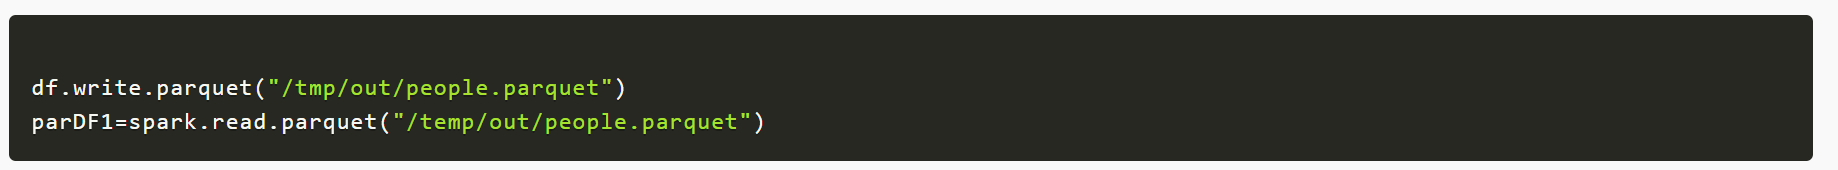

In [124]:
df.write.parquet('../ProjetoSparkKB/Dados/CANDIDATOS_2022.parquet')


In [82]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS.parquet'
               , engine='pyarrow'
               , index=False)


* Geração de arquivos parquet a partir de um DataFrame Pandas particionando (separando em vários arquivos) a partir dos valores de uma terminada coluna

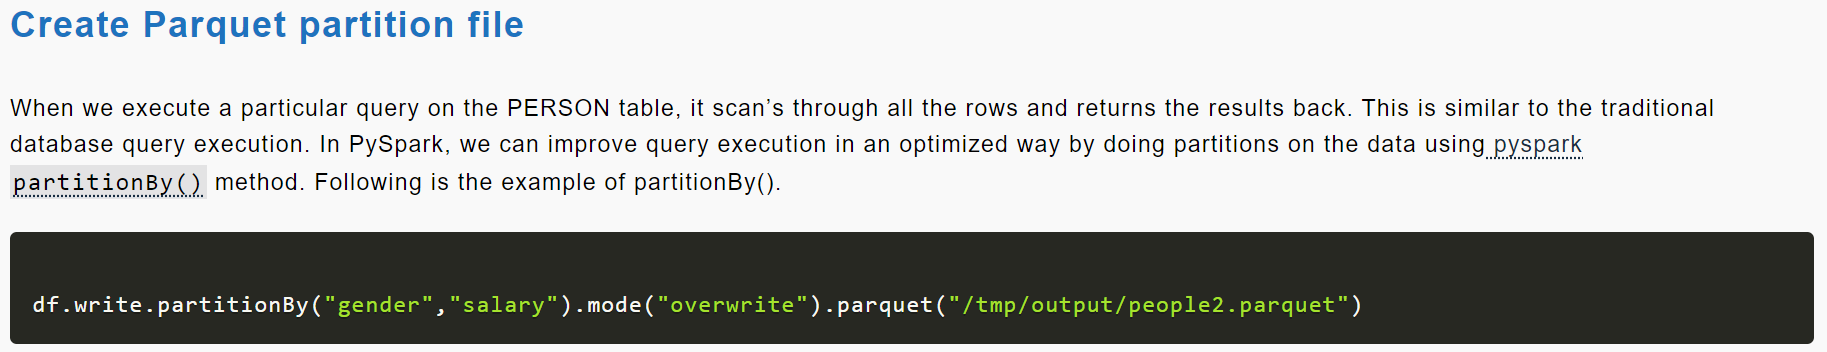

* * df.write.partitionBy("gender","salary").mode("overwrite").parquet("/tmp/output/people2.parquet")

In [83]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados'
               , engine='pyarrow'
               , index=False
               , partition_cols='SG_UF')


* Geração de um arquivo parquet zipado a partir de um DataFrame Pandas

In [84]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS_PARQUET.parquet.gzip'
               , engine='pyarrow'
               , index=False
               , compression='gzip')


* Geração de arquivos parquet a partir de um DataFrame Pandas particionando (separando em vários arquivos) a partir dos valores de uma terminada coluna

* Nessa geração é criada um diretório para cada valor distintio da coluna 'SG_UF'

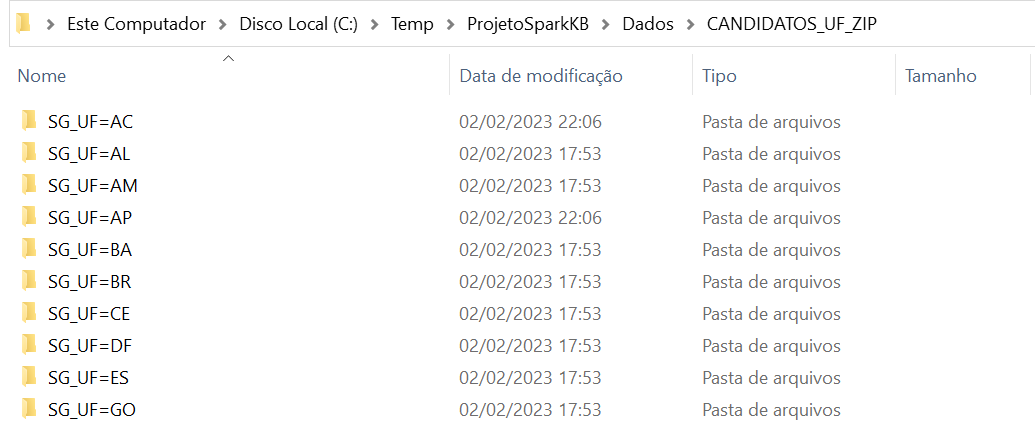

In [85]:

dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS_ZIP_UF'
               , engine='pyarrow'
               , index=False
               , compression='gzip'
               , partition_cols='SG_UF')


## 12.2 - Lendo Arquivos a Parquet

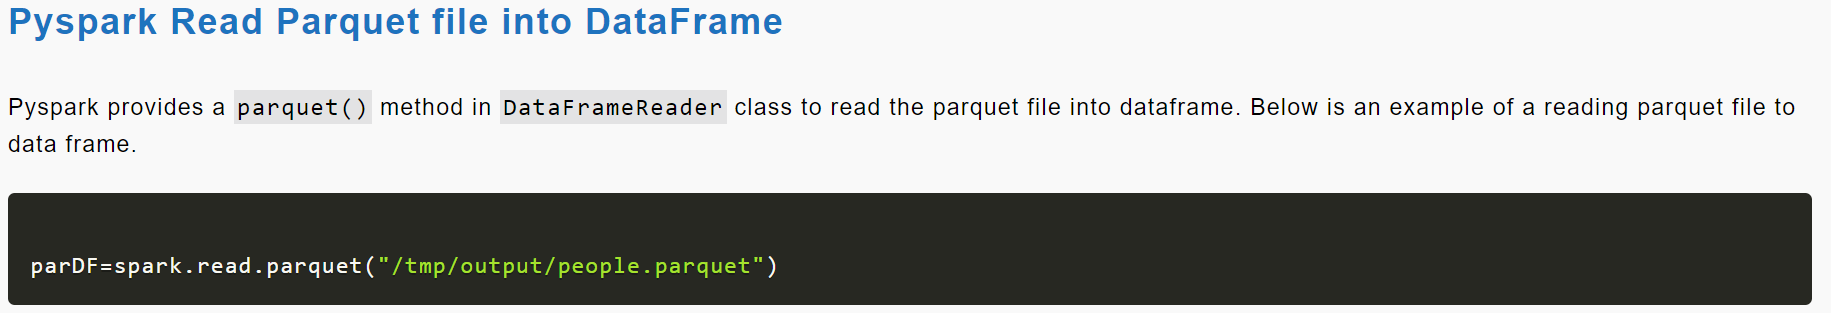

In [86]:
parDF=spark.read.parquet("../ProjetoSparkKB/Dados/CANDIDATOS.parquet")

#parDF1.head(4)

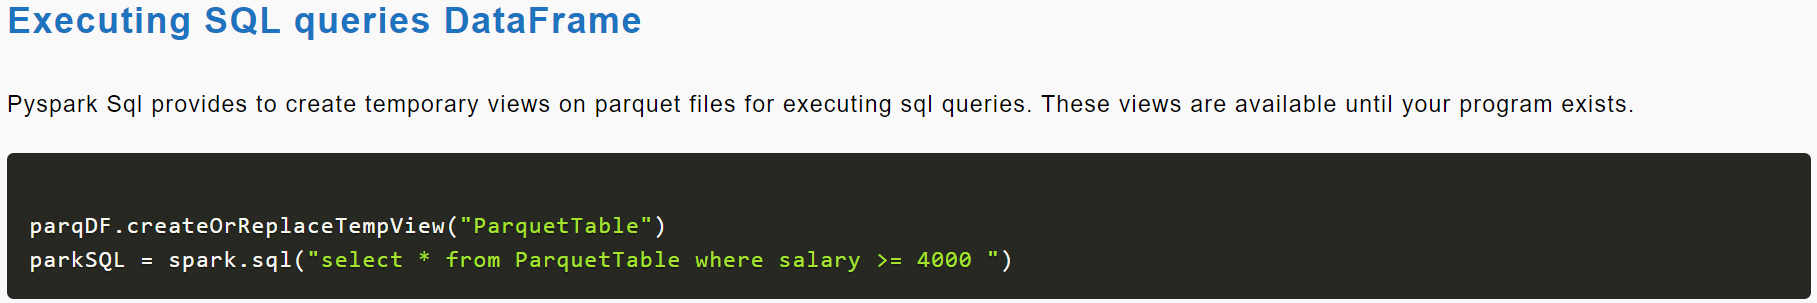

In [87]:
parDF.createOrReplaceTempView('ParquetCANDIDATOS')

parquetSQL = spark.sql("SELECT * FROM ParquetCANDIDATOS LIMIT 1")

parquetSQL

DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
21/01/2023,18:38:33,2022,2,ELEI��O ORDIN�RIA,1,546,Elei��es Gerais E...,02/10/2022,ESTADUAL,CE,CE,CEAR�,7,DEPUTADO ESTADUAL,60001613096,50011,TONY BEZERRA DE S...,TONY IN�CIO SHOW,#NULO#,12055010450,N�O DIVULG�VEL,12,APTO,2,DEFERIDO,FEDERA��O,50,PSOL,PARTIDO SOCIALISM...,3,Federa��o PSOL REDE,PSOL/REDE,PSOL/REDE,60001681655,FEDERA��O,PSOL/REDE,1,BRASILEIRA NATA,CE,-3,FORTALEZA,25/12/1995,27,044356531260,2,MASCULINO,7,SUPERIOR INCOMPLETO,1,SOLTEIRO(A),01,BRANCA,163,CANTOR E COMPOSITOR,1270629.01,5,SUPLENTE,N,N,-1,06005353420226060000,2,DEFERIDO,2,DEFERIDO,SIM,V�lido,2,Deferido,S


# 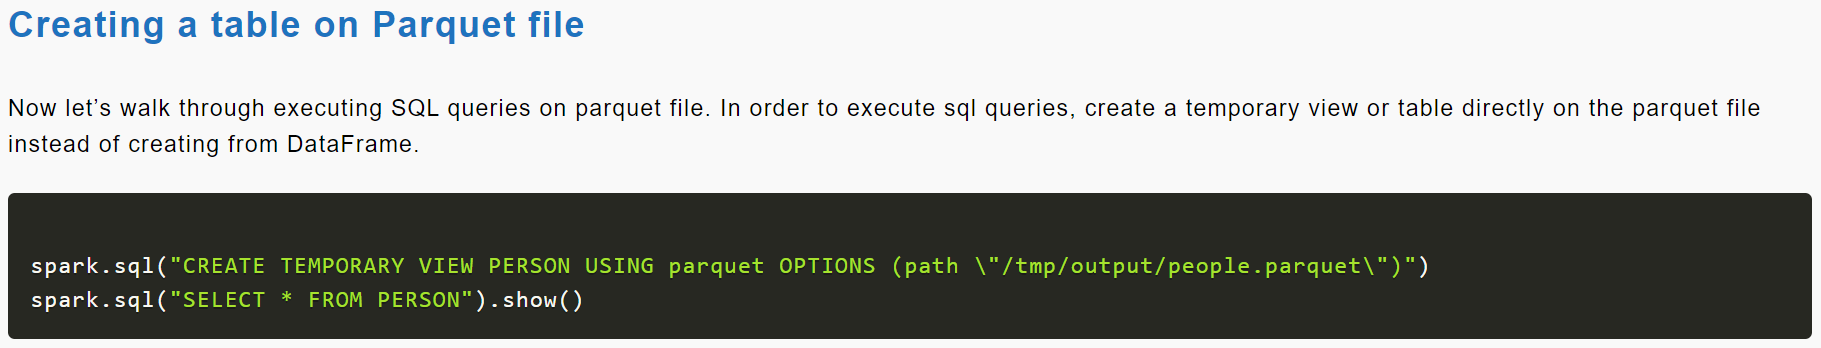

In [88]:

spark.sql("DROP VIEW IF EXISTS CANDIDATOS_AC")

spark.sql("""CREATE TEMPORARY VIEW CANDIDATOS_AC 
                USING parquet 
                OPTIONS (path \"../ProjetoSparkKB/Dados/CANDIDATOS_UF_ZIP/SG_UF=AC\")""")

dfAC = spark.sql("SELECT SG_UE , COUNT(1) TOTAL FROM CANDIDATOS_AC GROUP BY SG_UE")

dfAC

SG_UE,TOTAL
AC,1084


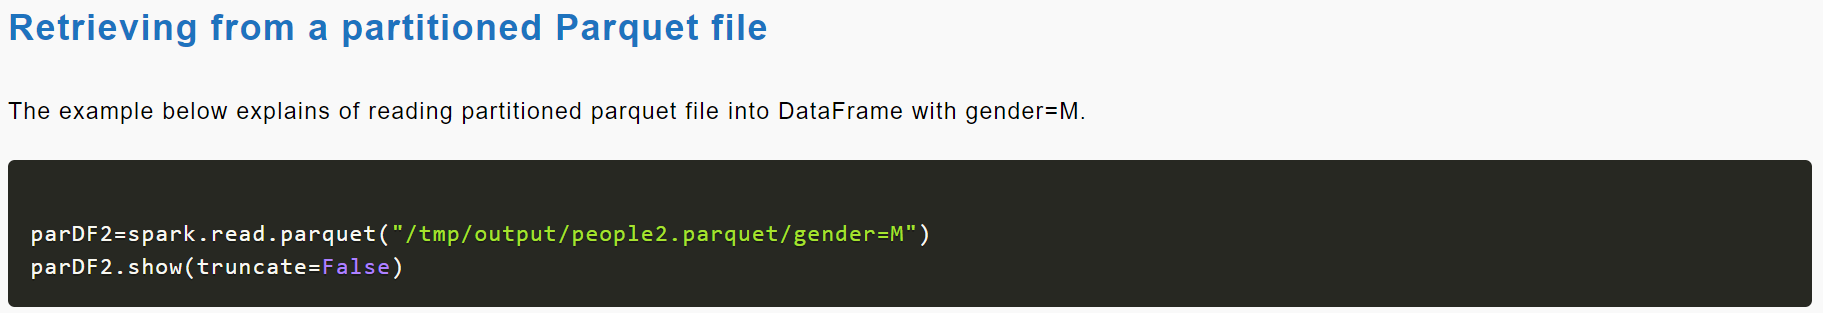

In [89]:
parDF2=spark.read.parquet("../ProjetoSparkKB/Dados/CANDIDATOS_UF_ZIP/SG_UF=AC")

parDF2.createOrReplaceTempView('ParquetCANDIDATOS_AC')

dfAC = spark.sql("SELECT SG_UE , COUNT(1) TOTAL FROM ParquetCANDIDATOS_AC GROUP BY SG_UE")

dfAC

SG_UE,TOTAL
AC,1084


In [90]:

spark.sql("DROP VIEW IF EXISTS CANDIDATOS")

spark.sql("""CREATE TEMPORARY VIEW CANDIDATOS 
                USING parquet 
                OPTIONS (path \"../ProjetoSparkKB/Dados/CANDIDATOS.parquet\")""")

dfSQL = spark.sql("SELECT * FROM CANDIDATOS LIMIT 1")

dfSQL

DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
21/01/2023,18:38:33,2022,2,ELEI��O ORDIN�RIA,1,546,Elei��es Gerais E...,02/10/2022,ESTADUAL,CE,CE,CEAR�,7,DEPUTADO ESTADUAL,60001613096,50011,TONY BEZERRA DE S...,TONY IN�CIO SHOW,#NULO#,12055010450,N�O DIVULG�VEL,12,APTO,2,DEFERIDO,FEDERA��O,50,PSOL,PARTIDO SOCIALISM...,3,Federa��o PSOL REDE,PSOL/REDE,PSOL/REDE,60001681655,FEDERA��O,PSOL/REDE,1,BRASILEIRA NATA,CE,-3,FORTALEZA,25/12/1995,27,044356531260,2,MASCULINO,7,SUPERIOR INCOMPLETO,1,SOLTEIRO(A),01,BRANCA,163,CANTOR E COMPOSITOR,1270629.01,5,SUPLENTE,N,N,-1,06005353420226060000,2,DEFERIDO,2,DEFERIDO,SIM,V�lido,2,Deferido,S


In [91]:
spark.sql("desc CANDIDATOS").show()

+-------------------+---------+-------+
|           col_name|data_type|comment|
+-------------------+---------+-------+
|         DT_GERACAO|   string|   null|
|         HH_GERACAO|   string|   null|
|        ANO_ELEICAO|   string|   null|
|    CD_TIPO_ELEICAO|   string|   null|
|    NM_TIPO_ELEICAO|   string|   null|
|           NR_TURNO|   string|   null|
|         CD_ELEICAO|   string|   null|
|         DS_ELEICAO|   string|   null|
|         DT_ELEICAO|   string|   null|
|     TP_ABRANGENCIA|   string|   null|
|              SG_UF|   string|   null|
|              SG_UE|   string|   null|
|              NM_UE|   string|   null|
|           CD_CARGO|   string|   null|
|           DS_CARGO|   string|   null|
|       SQ_CANDIDATO|   string|   null|
|       NR_CANDIDATO|   string|   null|
|       NM_CANDIDATO|   string|   null|
|  NM_URNA_CANDIDATO|   string|   null|
|NM_SOCIAL_CANDIDATO|   string|   null|
+-------------------+---------+-------+
only showing top 20 rows



# 13 - Gerando Arquivos a CSV

In [92]:
dfz = df.toPandas()

dfz.info()

dfz.to_csv('../ProjetoSparkKB/Dados/teste.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     29314 non-null  object
 1   HH_GERACAO                     29314 non-null  object
 2   ANO_ELEICAO                    29314 non-null  object
 3   CD_TIPO_ELEICAO                29314 non-null  object
 4   NM_TIPO_ELEICAO                29314 non-null  object
 5   NR_TURNO                       29314 non-null  object
 6   CD_ELEICAO                     29314 non-null  object
 7   DS_ELEICAO                     29314 non-null  object
 8   DT_ELEICAO                     29314 non-null  object
 9   TP_ABRANGENCIA                 29314 non-null  object
 10  SG_UF                          29314 non-null  object
 11  SG_UE                          29314 non-null  object
 12  NM_UE                          29314 non-null  object
 13  C

# 14 - Trabalhanco com Strings

In [93]:
arquivoEstabelecimentos = '../ProjetoSparkKB/Dados/Estabelecimentos.csv'

df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .csv(arquivoEstabelecimentos)

df_with_schema.printSchema()


root
 |-- CodCliente: string (nullable = true)
 |-- NomeCliente: string (nullable = true)
 |-- CodCPF: string (nullable = true)
 |-- CodCNPJ: string (nullable = true)



## 12.1 - F.lit()

## 12.2 - F.concat()

In [94]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
    F.concat(
    F.col('CodCliente'),
        F.lit(' - '),
    F.col('NomeCliente')    
    )
).show()

+----------+--------------------+------------------------------------+
|CodCliente|         NomeCliente|concat(CodCliente,  - , NomeCliente)|
+----------+--------------------+------------------------------------+
|         1|      Material de...|                1 -       Materia...|
|         2|  Quiosque Shopping |                2 - Quiosque Shop...|
|         3|       Lava Jato    |                   3 - Lava Jato    |
|         4|          Pastelaria|                      4 - Pastelaria|
|         5|           Oficina  |                       5 - Oficina  |
|         6|             Padaria|                       6 -   Padaria|
|         7|          Barbearia |                      7 - Barbearia |
|         8|Locadora de Autom...|                8 - Locadora de A...|
|         9|             PetShop|                       9 -   PetShop|
|        10|                 Bar|                            10 - Bar|
+----------+--------------------+------------------------------------+



## 12.3 - F.coalesce()

In [95]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
        F.col('CodCPF'),
    F.col('CodCNPJ'),
    F.coalesce(
    F.col('CodCPF'),
    F.col('CodCNPJ')    
    ).alias('Documento')
).show()

+----------+--------------------+---------+--------+---------+
|CodCliente|         NomeCliente|   CodCPF| CodCNPJ|Documento|
+----------+--------------------+---------+--------+---------+
|         1|      Material de...|     1234|    null|     1234|
|         2|  Quiosque Shopping |     null|  456789|   456789|
|         3|       Lava Jato    |141235215|    null|141235215|
|         4|          Pastelaria|   234234|    null|   234234|
|         5|           Oficina  |     null|33432543| 33432543|
|         6|             Padaria| 32423423|    null| 32423423|
|         7|          Barbearia |     null| 2342352|  2342352|
|         8|Locadora de Autom...|     null| 1251353|  1251353|
|         9|             PetShop|     null|  253325|   253325|
|        10|                 Bar| 15132532|    null| 15132532|
+----------+--------------------+---------+--------+---------+



## 12.4 - F.md5()

In [96]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
        F.col('CodCPF'),
    F.col('CodCNPJ'),
    F.md5(F.coalesce(
    F.col('CodCPF'),
    F.col('CodCNPJ')    
    )).alias('Documento')
).show()

+----------+--------------------+---------+--------+--------------------+
|CodCliente|         NomeCliente|   CodCPF| CodCNPJ|           Documento|
+----------+--------------------+---------+--------+--------------------+
|         1|      Material de...|     1234|    null|81dc9bdb52d04dc20...|
|         2|  Quiosque Shopping |     null|  456789|e35cf7b66449df565...|
|         3|       Lava Jato    |141235215|    null|88c27ad10985485d5...|
|         4|          Pastelaria|   234234|    null|0e9212587d373ca58...|
|         5|           Oficina  |     null|33432543|6a0699ef02b0db4e2...|
|         6|             Padaria| 32423423|    null|5cb6b4c4c40ecca3d...|
|         7|          Barbearia |     null| 2342352|a6b318610193b949a...|
|         8|Locadora de Autom...|     null| 1251353|3c1b39f1a9035609e...|
|         9|             PetShop|     null|  253325|97402952a258f4045...|
|        10|                 Bar| 15132532|    null|b80443f6cebe5f99d...|
+----------+--------------------+-----

## 12.5 - F.length()

In [97]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
        F.col('CodCPF'),
    F.col('CodCNPJ'),
    F.length(F.coalesce(
    F.col('CodCPF'),
    F.col('CodCNPJ')    
    )).alias('Documento')
).show()

+----------+--------------------+---------+--------+---------+
|CodCliente|         NomeCliente|   CodCPF| CodCNPJ|Documento|
+----------+--------------------+---------+--------+---------+
|         1|      Material de...|     1234|    null|        4|
|         2|  Quiosque Shopping |     null|  456789|        6|
|         3|       Lava Jato    |141235215|    null|        9|
|         4|          Pastelaria|   234234|    null|        6|
|         5|           Oficina  |     null|33432543|        8|
|         6|             Padaria| 32423423|    null|        8|
|         7|          Barbearia |     null| 2342352|        7|
|         8|Locadora de Autom...|     null| 1251353|        7|
|         9|             PetShop|     null|  253325|        6|
|        10|                 Bar| 15132532|    null|        8|
+----------+--------------------+---------+--------+---------+



## 12.6 - F.lower()

In [98]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
    F.lower(F.col('NomeCliente')).alias('Minusculo')
).show()

+----------+--------------------+--------------------+
|CodCliente|         NomeCliente|           Minusculo|
+----------+--------------------+--------------------+
|         1|      Material de...|      material de...|
|         2|  Quiosque Shopping |  quiosque shopping |
|         3|       Lava Jato    |       lava jato    |
|         4|          Pastelaria|          pastelaria|
|         5|           Oficina  |           oficina  |
|         6|             Padaria|             padaria|
|         7|          Barbearia |          barbearia |
|         8|Locadora de Autom...|locadora de autom...|
|         9|             PetShop|             petshop|
|        10|                 Bar|                 bar|
+----------+--------------------+--------------------+



## 12.7 - F.upper()

In [99]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
    F.upper(F.col('NomeCliente')).alias('Maiusculo')
).show()

+----------+--------------------+--------------------+
|CodCliente|         NomeCliente|           Maiusculo|
+----------+--------------------+--------------------+
|         1|      Material de...|      MATERIAL DE...|
|         2|  Quiosque Shopping |  QUIOSQUE SHOPPING |
|         3|       Lava Jato    |       LAVA JATO    |
|         4|          Pastelaria|          PASTELARIA|
|         5|           Oficina  |           OFICINA  |
|         6|             Padaria|             PADARIA|
|         7|          Barbearia |          BARBEARIA |
|         8|Locadora de Autom...|LOCADORA DE AUTOM...|
|         9|             PetShop|             PETSHOP|
|        10|                 Bar|                 BAR|
+----------+--------------------+--------------------+



## 12.8 - F.lpad()

In [100]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.lpad(F.col('CodCPF'),11,'0').alias('CodCPF'),
    F.lpad(F.col('CodCNPJ'),14,'0').alias('CodCNPJ')
).show()

+----------+--------------------+-----------+--------------+
|CodCliente|         NomeCliente|     CodCPF|       CodCNPJ|
+----------+--------------------+-----------+--------------+
|         1|      Material de...|00000001234|          null|
|         2|  Quiosque Shopping |       null|00000000456789|
|         3|       Lava Jato    |00141235215|          null|
|         4|          Pastelaria|00000234234|          null|
|         5|           Oficina  |       null|00000033432543|
|         6|             Padaria|00032423423|          null|
|         7|          Barbearia |       null|00000002342352|
|         8|Locadora de Autom...|       null|00000001251353|
|         9|             PetShop|       null|00000000253325|
|        10|                 Bar|00015132532|          null|
+----------+--------------------+-----------+--------------+



## 12.9 - F.rpad()

In [101]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.rpad(F.col('CodCPF'),11,'0').alias('CodCPF'),
    F.rpad(F.col('CodCNPJ'),14,'0').alias('CodCNPJ')
).show()

+----------+--------------------+-----------+--------------+
|CodCliente|         NomeCliente|     CodCPF|       CodCNPJ|
+----------+--------------------+-----------+--------------+
|         1|      Material de...|12340000000|          null|
|         2|  Quiosque Shopping |       null|45678900000000|
|         3|       Lava Jato    |14123521500|          null|
|         4|          Pastelaria|23423400000|          null|
|         5|           Oficina  |       null|33432543000000|
|         6|             Padaria|32423423000|          null|
|         7|          Barbearia |       null|23423520000000|
|         8|Locadora de Autom...|       null|12513530000000|
|         9|             PetShop|       null|25332500000000|
|        10|                 Bar|15132532000|          null|
+----------+--------------------+-----------+--------------+



## 12.10 - F.trim()

In [102]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.trim(F.col('NomeCliente')).alias('NomeCliente_SemEspaco')
).show()

+----------+--------------------+---------------------+
|CodCliente|         NomeCliente|NomeCliente_SemEspaco|
+----------+--------------------+---------------------+
|         1|      Material de...| Material de Const...|
|         2|  Quiosque Shopping |    Quiosque Shopping|
|         3|       Lava Jato    |            Lava Jato|
|         4|          Pastelaria|           Pastelaria|
|         5|           Oficina  |              Oficina|
|         6|             Padaria|              Padaria|
|         7|          Barbearia |            Barbearia|
|         8|Locadora de Autom...| Locadora de Autom...|
|         9|             PetShop|              PetShop|
|        10|                 Bar|                  Bar|
+----------+--------------------+---------------------+



## 12.11 - F.ltrim()

In [103]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.ltrim(F.col('NomeCliente')).alias('NomeCliente_SemEspaco')
).show()

+----------+--------------------+---------------------+
|CodCliente|         NomeCliente|NomeCliente_SemEspaco|
+----------+--------------------+---------------------+
|         1|      Material de...| Material de Const...|
|         2|  Quiosque Shopping |   Quiosque Shopping |
|         3|       Lava Jato    |        Lava Jato    |
|         4|          Pastelaria|           Pastelaria|
|         5|           Oficina  |            Oficina  |
|         6|             Padaria|              Padaria|
|         7|          Barbearia |           Barbearia |
|         8|Locadora de Autom...| Locadora de Autom...|
|         9|             PetShop|              PetShop|
|        10|                 Bar|                  Bar|
+----------+--------------------+---------------------+



## 12.12 - F.rtrim()

In [104]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.rtrim(F.col('NomeCliente')).alias('NomeCliente_SemEspaco')
).show()

+----------+--------------------+---------------------+
|CodCliente|         NomeCliente|NomeCliente_SemEspaco|
+----------+--------------------+---------------------+
|         1|      Material de...|       Material de...|
|         2|  Quiosque Shopping |    Quiosque Shopping|
|         3|       Lava Jato    |            Lava Jato|
|         4|          Pastelaria|           Pastelaria|
|         5|           Oficina  |              Oficina|
|         6|             Padaria|              Padaria|
|         7|          Barbearia |            Barbearia|
|         8|Locadora de Autom...| Locadora de Autom...|
|         9|             PetShop|              PetShop|
|        10|                 Bar|                  Bar|
+----------+--------------------+---------------------+



## 12.13 - F.substring()

In [105]:
df_with_schema.select(
F.col('CodCliente'),
    F.col('NomeCliente'),
     F.substring(F.col('NomeCliente'),2,5).alias('NomeCliente')
).show()

+----------+--------------------+-----------+
|CodCliente|         NomeCliente|NomeCliente|
+----------+--------------------+-----------+
|         1|      Material de...|           |
|         2|  Quiosque Shopping |      uiosq|
|         3|       Lava Jato    |      ava J|
|         4|          Pastelaria|      astel|
|         5|           Oficina  |      ficin|
|         6|             Padaria|       Pada|
|         7|          Barbearia |      arbea|
|         8|Locadora de Autom...|      ocado|
|         9|             PetShop|       PetS|
|        10|                 Bar|         ar|
+----------+--------------------+-----------+



# 13 - Relacionamentos (Join) - Inner, Left e Right

Documentação: https://sparkbyexamples.com/pyspark/pyspark-join-multiple-columns/#:~:text=The%20join%20syntax%20of%20PySpark,and%20joinType%20are%20optional%20arguments.

* Definição dos Arquios

In [106]:
arquivoCliente = '../ProjetoSparkKB/Dados/Cliente/clientes.csv'
arquivoEndereco = '../ProjetoSparkKB/Dados/Cliente/endereco.txt'


* Importação Arquivo de Cliente

In [107]:
dfCliente = spark.read.csv(arquivoCliente,sep=';',header=True, encoding='latin1')

dfCliente

cliente_id,nm_cliente,nr_cpf,dt_nasci,complemento,nr_telefone,cep,salario,desconto,banco_pgto
1820,Vitor Hugo da Luz,108908,30031986,"179,...",00-0910-2646,400487,3.580.121,21,033 - Santander
2275,Ian Moreira,163362,20031983,"97,c...",00-1365-3969,400487,1.116.351,208,033 - Santander
2730,Nicole Silva,217816,26041989,"194,...",00-1820-5292,400487,8954.32,219,033 - Santander
3185,Enrico Araújo,272270,18111982,"304,...",00-2275-6615,null,6.986.852,12,033 - Santander
3640,Lara Nogueira,326724,29081988,"207,...",00-2730-7938,400487,6.358.743,220,033 - Santander
4095,Carlos Eduardo da...,381178,15011997,"121,...",00-3185-9261,400487,1.823.927,149,033 - Santander
4550,Larissa Correia,435632,15071997,"309,...",00-3641-0584,400487,6.604.229,164,033 - Santander
5005,Rafaela Viana,490086,19051996,"66,c...",00-4096-1907,400487,2.510.315,214,033 - Santander
5460,Raul Carvalho,544540,16011988,"333,...",00-4551-3230,null,6.461.336,64,033 - Santander
5915,Lorenzo Novaes,598994,25051983,"21,c...",00-5006-4553,512496,6.373.171,192,033 - Santander


* Importação Arquivo de Endereço

In [108]:
dfEndereco = spark.read.csv(arquivoEndereco,sep='|',header=True, encoding='utf-8')

dfEndereco

cep_id,nm_enredeco,bairro,cidade,UF
305095,av jucelino cursino,centro,São paulo,SP
303989,av brasil,centro,São paulo,SP
400487,av interlargos,centro,São paulo,SP
512496,av copacabana,centro,Rio de Janeiro,RJ
965268,rua dom pedro pri...,centro,São paulo,SP
931429,rua vicente giaca...,Vila zilda,São paulo,SP
287560,rua governador va...,Vila zilda,São paulo,SP
840060,rua sérgio vicente,Vila zilda,São paulo,SP
746023,rua ana carolina ...,Vicenza,São paulo,SP
187173,rua sabrina freire,Vicenza,São paulo,SP


## 13.1 - Relacionamento do Tipo INNER JOIN

### 13.1.1 - Padrão Default

In [109]:
help(dfEndereco.join)

Help on method join in module pyspark.sql.dataframe:

join(other: 'DataFrame', on: Union[str, List[str], pyspark.sql.column.Column, List[pyspark.sql.column.Column], NoneType] = None, how: Optional[str] = None) -> 'DataFrame' method of pyspark.sql.dataframe.DataFrame instance
    Joins with another :class:`DataFrame`, using the given join expression.
    
    .. versionadded:: 1.3.0
    
    Parameters
    ----------
    other : :class:`DataFrame`
        Right side of the join
    on : str, list or :class:`Column`, optional
        a string for the join column name, a list of column names,
        a join expression (Column), or a list of Columns.
        If `on` is a string or a list of strings indicating the name of the join column(s),
        the column(s) must exist on both sides, and this performs an equi-join.
    how : str, optional
        default ``inner``. Must be one of: ``inner``, ``cross``, ``outer``,
        ``full``, ``fullouter``, ``full_outer``, ``left``, ``leftouter``,

In [110]:
dfCliente.join(dfEndereco,on=[F.col('cep')==F.col('cep_id')]).count()

50

In [111]:
dfCliente.join(dfEndereco,on=[dfCliente['cep']==dfEndereco['cep_id']]).count()

50

In [112]:
dfCliente.join(dfEndereco,on=[dfCliente['cep']==dfEndereco['cep_id']]).select('cliente_id','nm_cliente','bairro','cidade','UF')

cliente_id,nm_cliente,bairro,cidade,UF
1820,Vitor Hugo da Luz,centro,São paulo,SP
2275,Ian Moreira,centro,São paulo,SP
2730,Nicole Silva,centro,São paulo,SP
3640,Lara Nogueira,centro,São paulo,SP
4095,Carlos Eduardo da...,centro,São paulo,SP
4550,Larissa Correia,centro,São paulo,SP
5005,Rafaela Viana,centro,São paulo,SP
5915,Lorenzo Novaes,centro,Rio de Janeiro,RJ
6370,Alexia Ribeiro,centro,Rio de Janeiro,RJ
6825,Bárbara Nogueira,centro,Rio de Janeiro,RJ


In [113]:
dfCliente.join(dfEndereco,on=[dfCliente['cep']==dfEndereco['cep_id']]).select(dfCliente.cliente_id
                                                                              ,dfCliente.nm_cliente
                                                                              ,dfEndereco.bairro
                                                                              ,dfEndereco.cidade
                                                                              ,dfEndereco.UF)

cliente_id,nm_cliente,bairro,cidade,UF
1820,Vitor Hugo da Luz,centro,São paulo,SP
2275,Ian Moreira,centro,São paulo,SP
2730,Nicole Silva,centro,São paulo,SP
3640,Lara Nogueira,centro,São paulo,SP
4095,Carlos Eduardo da...,centro,São paulo,SP
4550,Larissa Correia,centro,São paulo,SP
5005,Rafaela Viana,centro,São paulo,SP
5915,Lorenzo Novaes,centro,Rio de Janeiro,RJ
6370,Alexia Ribeiro,centro,Rio de Janeiro,RJ
6825,Bárbara Nogueira,centro,Rio de Janeiro,RJ


In [114]:

dfEndereco = dfEndereco.withColumnRenamed('cep_id','cep')

dfCliente.join(dfEndereco,["cep","cep"]).show()

+------+------+----------+--------------------+-------+--------+--------------------+------------+---------+--------+---------------+--------------------+----------+--------------+---+
|   cep|   cep|cliente_id|          nm_cliente| nr_cpf|dt_nasci|         complemento| nr_telefone|  salario|desconto|     banco_pgto|         nm_enredeco|    bairro|        cidade| UF|
+------+------+----------+--------------------+-------+--------+--------------------+------------+---------+--------+---------------+--------------------+----------+--------------+---+
|400487|400487|      1820|   Vitor Hugo da Luz| 108908|30031986|             179,...|00-0910-2646|3.580.121|      21|033 - Santander|      av interlargos|    centro|     São paulo| SP|
|400487|400487|      2275|         Ian Moreira| 163362|20031983|             97,c...|00-1365-3969|1.116.351|     208|033 - Santander|      av interlargos|    centro|     São paulo| SP|
|400487|400487|      2730|        Nicole Silva| 217816|26041989|           

In [115]:
dfCliente.printSchema()

root
 |-- cliente_id: string (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- nr_cpf: string (nullable = true)
 |-- dt_nasci: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- nr_telefone: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- desconto: string (nullable = true)
 |-- banco_pgto: string (nullable = true)



### 13.1.2 - Explicitando o Tipo de Relacionamento

In [116]:
dfEndereco = dfEndereco.withColumnRenamed('cep','cep_id')

In [117]:
dfCliente.join(dfEndereco,on=[F.col('cep')==F.col('cep_id')],how='inner').count()

50

## 13.2 - Relacionamento do Tipo LEFT JOIN

In [118]:
dfCliente.join(dfEndereco,on=[F.col('cep')==F.col('cep_id')],how='left')

cliente_id,nm_cliente,nr_cpf,dt_nasci,complemento,nr_telefone,cep,salario,desconto,banco_pgto,cep_id,nm_enredeco,bairro,cidade,UF
1820,Vitor Hugo da Luz,108908,30031986,"179,...",00-0910-2646,400487,3.580.121,21,033 - Santander,400487,av interlargos,centro,São paulo,SP
2275,Ian Moreira,163362,20031983,"97,c...",00-1365-3969,400487,1.116.351,208,033 - Santander,400487,av interlargos,centro,São paulo,SP
2730,Nicole Silva,217816,26041989,"194,...",00-1820-5292,400487,8954.32,219,033 - Santander,400487,av interlargos,centro,São paulo,SP
3185,Enrico Araújo,272270,18111982,"304,...",00-2275-6615,null,6.986.852,12,033 - Santander,null,null,null,null,null
3640,Lara Nogueira,326724,29081988,"207,...",00-2730-7938,400487,6.358.743,220,033 - Santander,400487,av interlargos,centro,São paulo,SP
4095,Carlos Eduardo da...,381178,15011997,"121,...",00-3185-9261,400487,1.823.927,149,033 - Santander,400487,av interlargos,centro,São paulo,SP
4550,Larissa Correia,435632,15071997,"309,...",00-3641-0584,400487,6.604.229,164,033 - Santander,400487,av interlargos,centro,São paulo,SP
5005,Rafaela Viana,490086,19051996,"66,c...",00-4096-1907,400487,2.510.315,214,033 - Santander,400487,av interlargos,centro,São paulo,SP
5460,Raul Carvalho,544540,16011988,"333,...",00-4551-3230,null,6.461.336,64,033 - Santander,null,null,null,null,null
5915,Lorenzo Novaes,598994,25051983,"21,c...",00-5006-4553,512496,6.373.171,192,033 - Santander,512496,av copacabana,centro,Rio de Janeiro,RJ


## 13.3 - Relacionamento do Tipo RIGHT JOIN

In [119]:
dfCliente.join(dfEndereco,on=[F.col('cep')==F.col('cep_id')],how='right').show(2)

+----------+----------+------+--------+-----------+-----------+----+-------+--------+----------+------+-------------------+------+---------+---+
|cliente_id|nm_cliente|nr_cpf|dt_nasci|complemento|nr_telefone| cep|salario|desconto|banco_pgto|cep_id|        nm_enredeco|bairro|   cidade| UF|
+----------+----------+------+--------+-----------+-----------+----+-------+--------+----------+------+-------------------+------+---------+---+
|      null|      null|  null|    null|       null|       null|null|   null|    null|      null|305095|av jucelino cursino|centro|São paulo| SP|
|      null|      null|  null|    null|       null|       null|null|   null|    null|      null|303989|          av brasil|centro|São paulo| SP|
+----------+----------+------+--------+-----------+-----------+----+-------+--------+----------+------+-------------------+------+---------+---+
only showing top 2 rows



In [120]:
dfEndereco.select('bairro').distinct().show()

+-----------+
|     bairro|
+-----------+
|     centro|
| Vila zilda|
|    Vicenza|
|Nova Iorque|
+-----------+



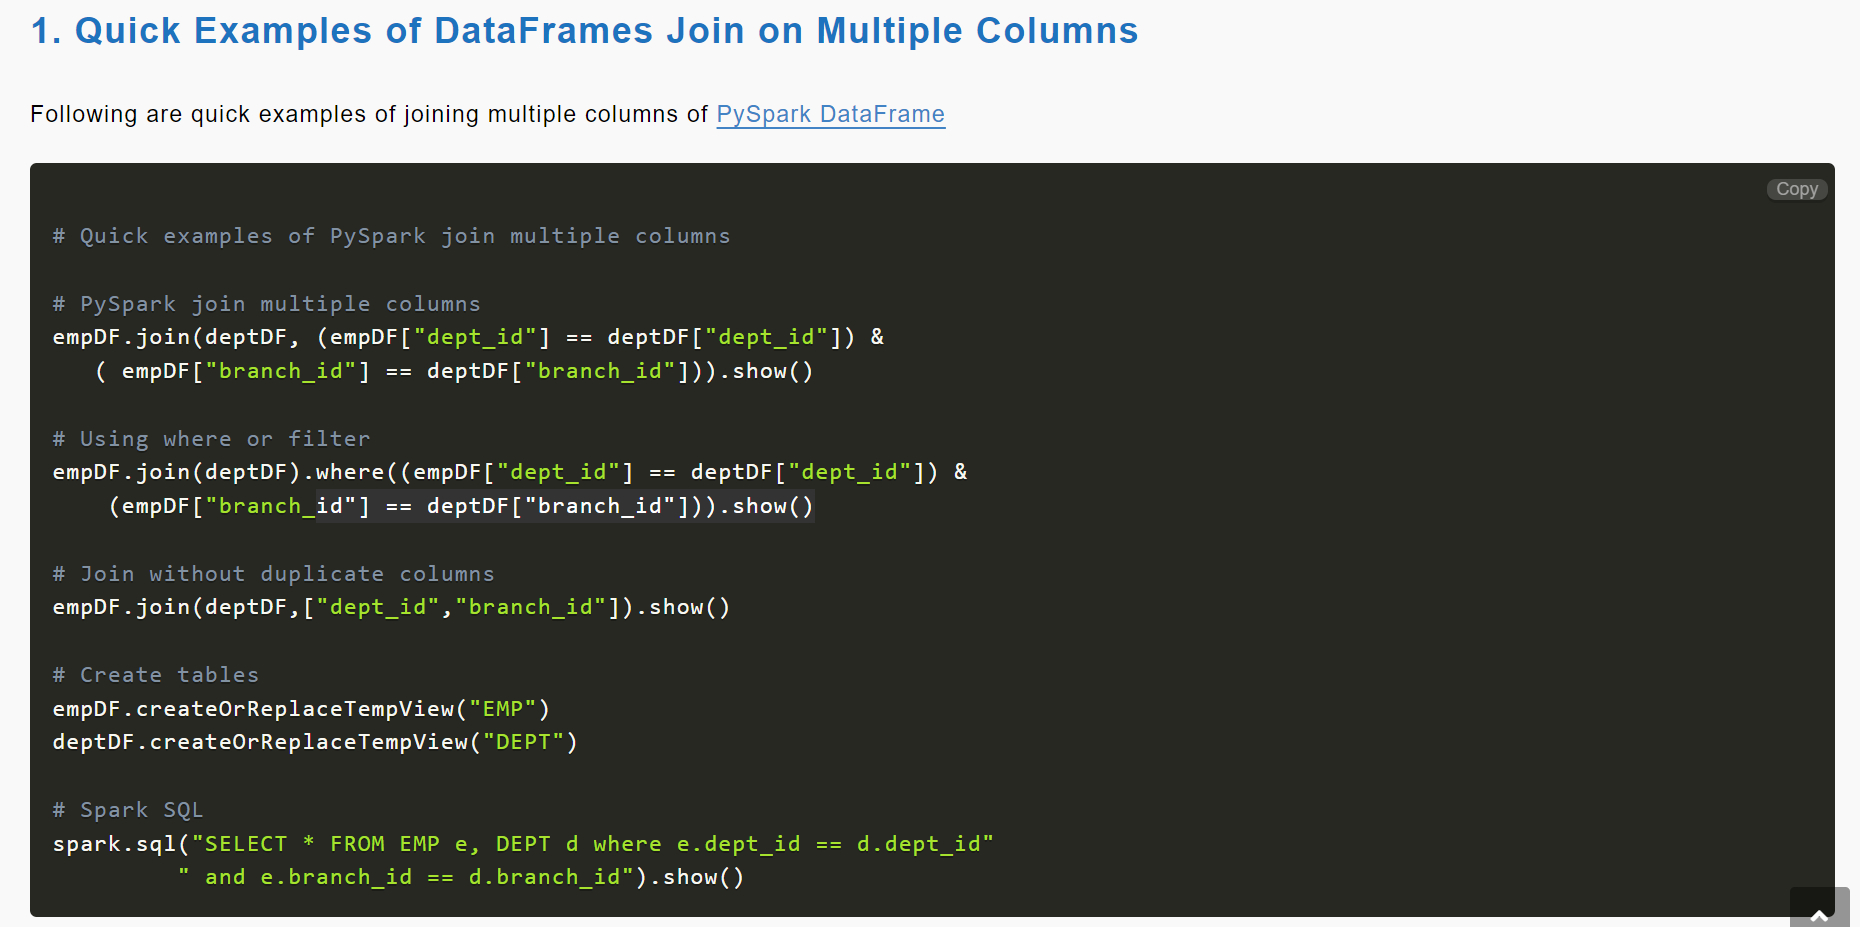

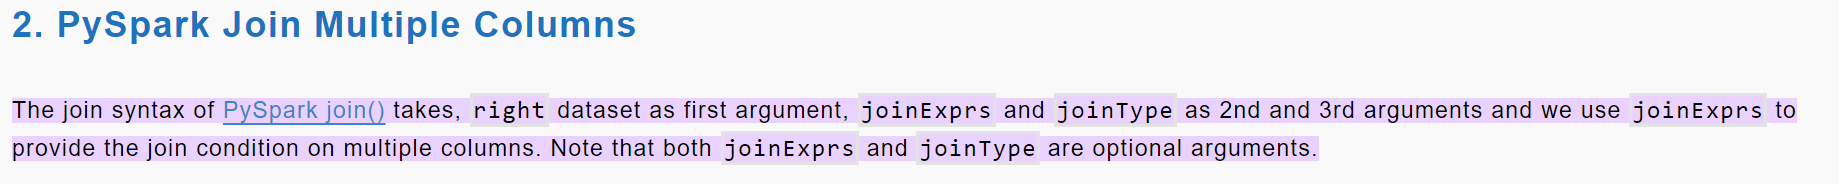
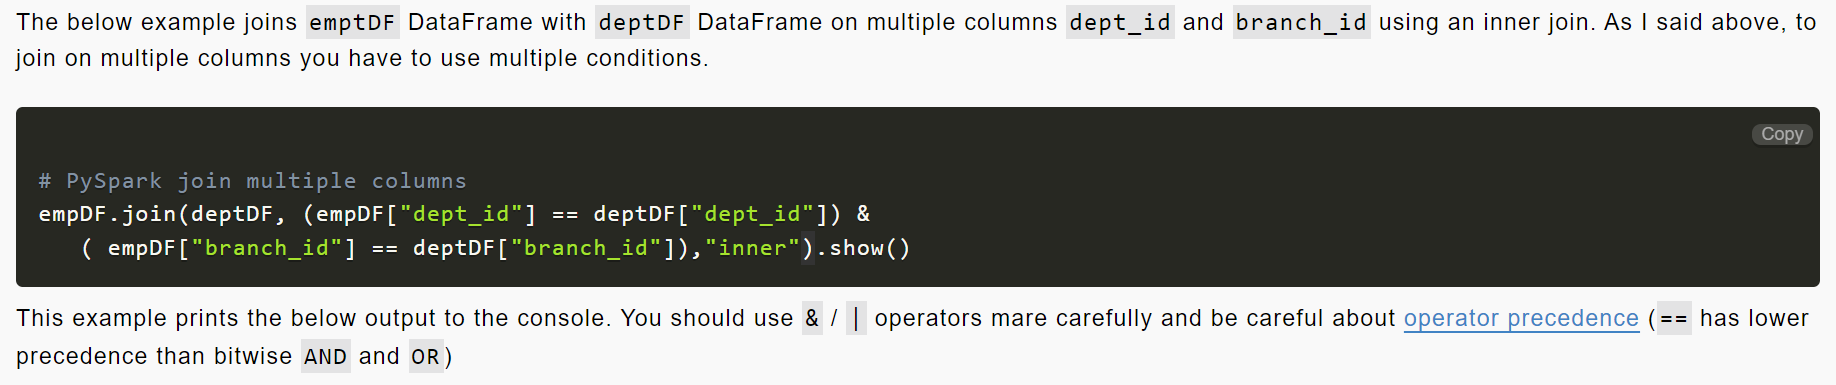

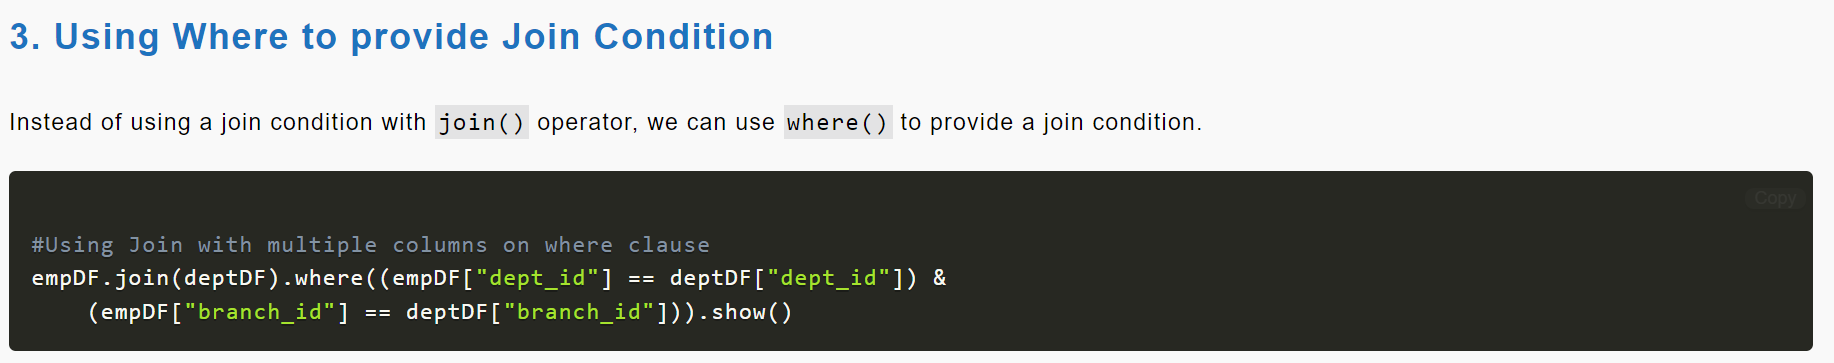

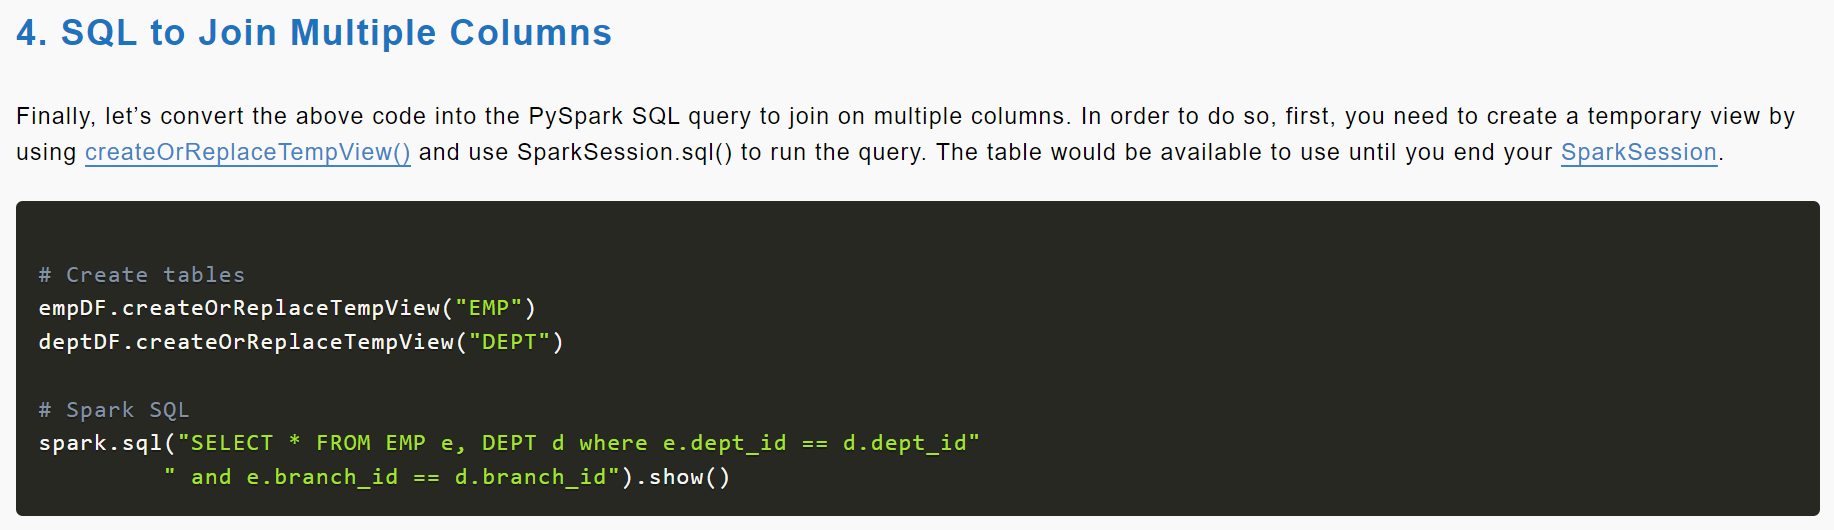

In [121]:
dfEndereco.createOrReplaceTempView('Tb_Endereco')

dfCliente.createOrReplaceTempView('Tb_Cliente')

In [122]:
spark.sql("""SELECT count(1) Total
FROM Tb_Cliente a
INNER JOIN Tb_Endereco B
WHERE A.cep = B.cep_id
""").show()

+-----+
|Total|
+-----+
|   50|
+-----+



# 99 - Pesquisas Futuras

https://sparkbyexamples.com/spark/spark-convert-csv-to-avro-parquet-json/

video para correção do erro ao salvar Parquet

https://www.youtube.com/watch?v=s2yjvQPGsyw

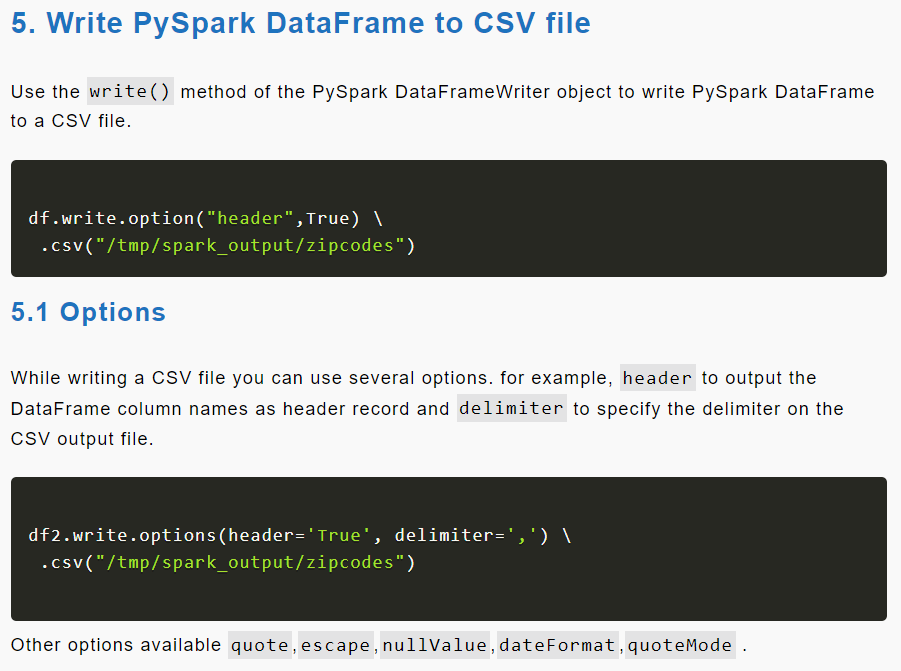

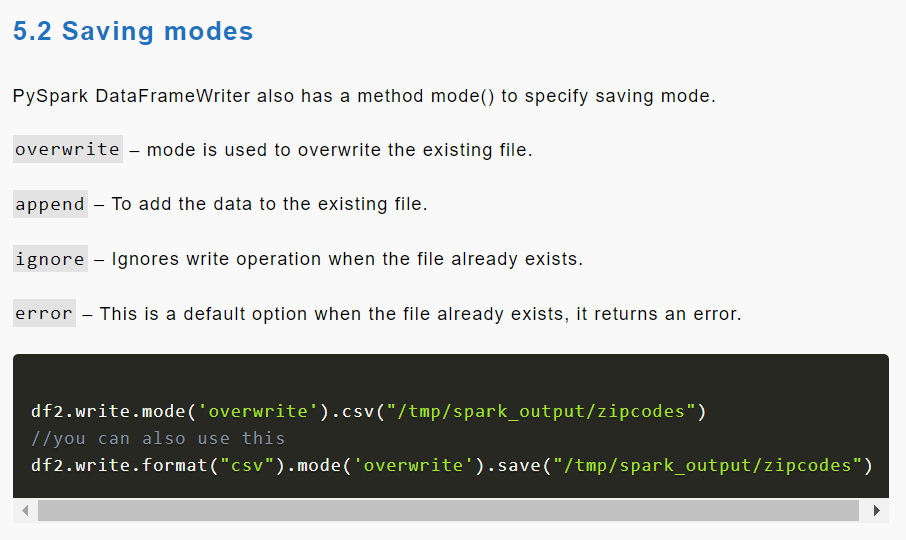

# Sessão Destinada a Fontes de Pesquisa

* https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/